In [2]:
# Before submission, set this to True so that you can render and verify this notebook without retraining all the deep learning models.
# All models will be loaded from file instead.
stop_training = True

In [3]:

# Uncomment the following line to run in Google Colab
# This will link the notebook to your Google drive to store your models and cache the dataset.
# This will probably ask you to click on a link to get a verification code.

#from google.colab import drive
#drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Uncomment the following line to run in Google Colab to install OpenML

#!pip install --quiet openml 

# Uncomment to install pydot (for generating the report)
!pip install --quiet pydot 

     |████████████████████████████████| 112kB 5.9MB/s 


In [5]:
# Uncomment the following to check whether you have access to a GPU in Google Colab
# See further instructione below.

import tensorflow as tf
#tf.config.experimental.list_physical_devices('GPU') 

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [6]:
%matplotlib inline
import openml as oml
import numpy as np
import matplotlib.pyplot as plt
import sklearn

In [7]:
# Uncomment to use OpenML caching with your Google Drive. After longer periods of inactivity, your Colab VM may be recycled, 
# in which case the dataset will have to be downloaded again. To avoid this, use the code below to let OpenML cache the dataset 
# on your Google Drive.
# On your local machine, it will store data in a hidden folder '~/.openml'

#import os
#oml.config.cache_directory = os.path.expanduser('/content/cache')

In [8]:
from packaging import version
import sklearn
import tensorflow
sklearn_version = sklearn.__version__
tensorflow_version = tensorflow.__version__
if version.parse(tensorflow_version) < version.parse("2.2.0"):
    print("Tensorflow is outdated. This is version {}. Please update to 2.2 or later (e.g. 2.4)".format(tensorflow_version))
elif version.parse(tensorflow_version) < version.parse("2.4.0"):
    print("Tensorflow version is <2.4. This will likely work but we recommend updating to 2.4".format(tensorflow_version))
else:
    print("Looks good. You may continue :)")

Looks good. You may continue :)


# Assignment 3

In [ ]:
# Fill in your names using the format below
your_name = "Hegde, Medha Manjunath"

### Choice of libraries
We recommend to use Tensorflow in this assignment since that is what we covered in the labs. If you feel confident using PyTorch (and Skorch for the scikit-learn wrapper), that is allowed too, as long as you are able to implement the requested functions and return the requested data. Read the assignment carefully and ensure that you can. Note that you may also need to do a bit more work to implement certain helper functions and wrappers.

### Using GPUs
While you can solve this assignment on a CPU, using a GPU will speed up training a lot. If you have a local GPU, you can use that. If you don't, we recommend Google Colab. When you are in Colab:
* In Runtime > Change runtime type, select the GPU under Hardware Accelerator
* Run the 4th cell on the top of this notebook to check that the GPU is found.

Note that the free version of Colab may not always have GPUs ready all the time, and may deny you a GPU when you have used them a lot. When you are temporarily 'locked out', you can switch to a non-GPU runtime or to a local instance of Jupyter running on your machine. Take this into account in your planning, so that you don't do all your training at the last moment and are locked out right before the deadline.

### Storing and submitting files
You must be able to store your models and submit them to GitHub Classroom. The evaluation functions used in this notebook will automatically store models for you. Be sure to upload all .h5 and .p files, as well as any .json files created (these are created only for large models).

If you want to run and solve the notebook on your local machine/laptop, fill in the path 'base_dir' to your assignment folder into the next cell.

If you use Colab, we recommend that you link it to your Google Drive:  
* Upload the assignment folder to your Google Drive (+ New > Folder Upload)
* Open Colab in a browser, open the 'Files' menu in the left sidebar, and click 'Mount Drive'
  * At this point you may need to authenticate
  * The 2nd cell (above) does this programmatically for you
* Fill in the path to your assignment folder below
  * It's likely `base_dir = '/content/drive/My Drive/assignment-3-name'`
  * 'name' will likely be your github handle

In [9]:
# Define where the models should be stored
base_dir = '../'

### Verification and submission

If you use Colab, there are a few things to consider before submission:
* You need to download the notebook and all the models from your Google Drive to a local folder. Models should be stored in the main directory, next to your notebook.
* To run the notebook locally (e.g. for the verification script), make sure that you have set `stop_training = True` in the first cell to avoid retraining all models. Also comment out any Colab-specific code in the cells above.
* Set `base_dir` back to your local directory where the files are, likely `base_dir = './'`
* Again, don't wait until the last moment to verify and submit.

### Constraints
* Your stored models should not be larger than 100MB when stored in file. GitHub will not allow uploading if they are. We provide code below that stores the model efficiently. Smaller models are simply stored entirely to disk as one h5 file. For larger models, we will only store the weights (h5 file) and structure (json file), and ignore the state of the optimizer. In any case, the weights alone should not take more than 100MB of storage. Take this into account especially for loading pre-trained models in the last question. Bigger pre-trained models are not always better - in fact they will easily overfit. Make sure that your model weights take less than 100MB of storage.
* When questions ask you to provide an explanation, it should be less than 800
characters long. Some questions have a higher limit. Always answer in full sentences.
* Don't train for more than 120 epochs, i.e. don't throw excessing computational resources at the problem. If your model hasn't converged by then, think of ways it could be made to converge faster. In this assignment you are not after the last tiny improvement, you can stop when learning curves flatten out. Do at least 5 epochs to get a reasonable learning curve.

### Grading
Grading is based on the following aspects:
* Correctness in answering the question. Carefully read the question and answer
what is asked for. Train your models on the correct data. It should be clear on which data should be trained, but ask when in doubt. When something is not defined (e.g. the number of epochs or batch size), you can freely choose them.
* Clarity of your explanations. Write short but precise descriptions of what you did and why. Give short but clear explanations of the observed performance. 
After your explanation, your approach and model should make perfect sense. Refrain from using symbols as substitute for words in your explanation (e.g. no: "More layers -> more parameters", yes: "More layers mean more parameters"). 
* Part of your grade depends on how well your models perform. When the question says 'you should at least get x%', x% will give you a good but not the maximal grade. You can get the full grade when you are close to what is the expected maximal performance, with the top grade awarded to the best model in class. You don't need to invest lots of effort into the last tiny improvement, though. Unless specified, we look at the accuracy on the validation set. If your learning curves are very erratic we'll compute a score based on the smoothed curves (i.e. single peaks don't count).
* The weight of each question is indicated. Take this into account when planning your time.

### Other tips
* Don't wait until the last minute to do the assignment. The models take time to train, most questions will require some thinking, and some require you to read up on some new concepts.
* Take care that you upload the results as requested. You need to submit not only the notebooks but also the trained models and learning curves (training histories). Be sure to run the verification script and check that all the results are included.
* The dataset we will use is quite large and can take a while to download and cache for the first time, especially if you have limited RAM on your local device (laptop). Once cached, it should load fast. Even if you use Colab, at least run the notebook once locally when you start doing the assignment (i.e., now). That way the dataset will be cached so that you can do the verification faster.
* We provide an evaluation function that also stored models to disk. After you are done training the model, set the 'train' attribute to False so that the model doesn't train again (and loads from file instead) when you restart and rerun your notebook.
* Explore. For many questions we'll ask you to explain your model design decisions. You cannot magically know the best solutions but you can experiment
based on your understanding and make decisions based on both your knowledge and experiments. Your explanation is at least as important as the performance of your model. Don't say 'I tried every possible option and this is the best I found', but rather 'I tried X because I think that Y' and then interpret the results and what you learned from them'.
* **Be original. We will check for plagiarism between student submissions.**

### Data
The [Oxford Pets](https://www.openml.org/d/42820) dataset contains 128-by-128 RGB images of 37 different types of cats and dogs. Your goal is to build models that recognize the correct type of animal in each image. Below is the list of all classes and the subset of cat breeds.

In [10]:
# Download the Oxford Pets dataset. Takes a while, and quite a bit of memory when it 
# needs to download. After caching it loads faster.
oxford_pets = oml.datasets.get_dataset(42819)
X, y, _, _ = oxford_pets.get_data(dataset_format='array',
    target = oxford_pets.default_target_attribute)

class_names = ['abyssinian', 'american_bulldog', 'american_pit_bull_terrier', 'basset_hound', 'beagle', 
               'bengal', 'birman', 'bombay', 'boxer', 'british_shorthair', 'chihuahua', 'egyptian_mau', 
               'english_cocker_spaniel', 'english_setter', 'german_shorthaired', 'great_pyrenees', 'havanese',
               'japanese_chin', 'keeshond', 'leonberger', 'maine_coon', 'miniature_pinscher', 'newfoundland',
               'persian', 'pomeranian', 'pug', 'ragdoll', 'russian_blue', 'saint_bernard', 'samoyed', 'scottish_terrier',
               'shiba_inu', 'siamese', 'sphynx', 'staffordshire_bull_terrier', 'wheaten_terrier', 'yorkshire_terrier']
cat_breeds = ['abyssinian', 'bengal','birman', 'bombay', 'british_shorthair', 'egyptian_mau', 'maine_coon',
              'persian', 'ragdoll', 'russian_blue', 'siamese', 'sphynx']

Reshape, sample and split the data

In [11]:
from tensorflow.keras.utils import to_categorical

Xr = X.reshape((len(X),128,128,3))
Xr = Xr / 255.
yr = to_categorical(y)

In [12]:
# DO NOT EDIT. DO NOT OVERWRITE THESE VARIABLES.
from sklearn.model_selection import train_test_split
# We do an 80-20 split for the training and test set, and then again a 80-20 split into training and validation data
X_train_all, X_test, y_train_all, y_test = train_test_split(Xr,yr, stratify=yr, train_size=0.8, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train_all,y_train_all, stratify=y_train_all, train_size=0.8, random_state=1)
evaluation_split = X_train, X_val, y_train, y_val

Check the formatting - and what the data looks like

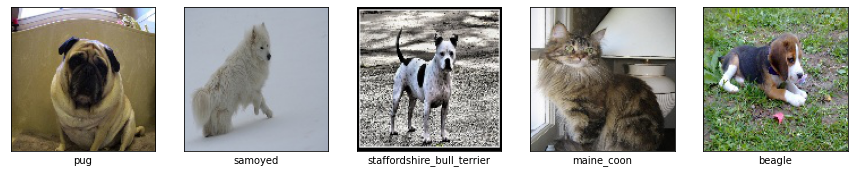

In [13]:
from random import randint

# Takes a list of row ids, and plots the corresponding images
# Use grayscale=True for plotting grayscale images
def plot_images(X, y, grayscale=False):
    fig, axes = plt.subplots(1, len(X),  figsize=(15,30))
    for n in range(len(X)):
        if grayscale:
            axes[n].imshow(X[n], cmap='gray')
        else:
            axes[n].imshow(X[n])
        axes[n].set_xlabel(class_names[np.argmax(y[n])])
        axes[n].set_xticks(()), axes[n].set_yticks(())
    plt.show();

images = [randint(0,len(X_train)) for i in range(5)]
X_random = [X_train[i] for i in images]
y_random = [y_train[i] for i in images]
plot_images(X_random, y_random)

### Evaluation harness
We provide an evaluation function 'run_evaluation' that you should use to 
evaluate all your models. It also stores the trained models to disk so that
your submission can be quickly verified, as well as to avoid having to train
them over and over again. Your last run of the evaluation function (the last one
stored to file), is the one that will be evaluated. The 'train' argument indicates whether to train or to load from disk. We have provided helper functions for saving and loading models to/from file, assuming you use TensorFlow. If you use PyTorch you'll have to adapt them.

In [14]:
import os
import pickle
import pandas as pd
import numpy as np
from tensorflow.keras.models import load_model # for use with tensorflow
from tensorflow.keras.models import model_from_json
import pydot
from tensorflow.keras.utils import plot_model
from IPython.display import Image
import inspect
from IPython.core import page
page.page = print

# Helper function for user feedback
def shout(text, verbose=1):
    """ Prints text in red. Just for fun.
    """
    if verbose>0:
        print('\033[91m'+text+'\x1b[0m')
        
# Helper function to extract min/max from the learning curves
def minMax(x):
    return pd.Series(index=['min','max'],data=[x.min(),x.max()])

# Helper function to format answers
def print_answer(ans):
    output = ""
    for line in ans.splitlines()[0:]:
        output += line.strip() + " "
    output += "(length: "+str(len(output))+")\n"
    print(output)
    

def load_model_from_file(base_dir, name, extension='.h5'):
    """ Loads a model from a file. The returned model must have a 'fit' and 'summary'
    function following the Keras API. Don't change if you use TensorFlow. Otherwise,
    adapt as needed. 
    Keyword arguments:
    base_dir -- Directory where the models are stored
    name -- Name of the model, e.g. 'question_1_1'
    extension -- the file extension
    """
    try:
        # if a json description is available, load config and then weights
        if os.path.isfile(os.path.join(base_dir, name+'.json')):
            json_file = open(os.path.join(base_dir, name+'.json'), 'r')
            loaded_model_json = json_file.read()
            json_file.close()
            model = model_from_json(loaded_model_json)
            model.load_weights(os.path.join(base_dir, name+extension))
        # else just load the entire model from hdf5 file
        else:
            model = load_model(os.path.join(base_dir, name+extension))
    except OSError:
        shout("Saved model could not be found. Was it trained and stored correctly? Is the base_dir correct?")
        return False
    return model

def save_model_to_file(model, base_dir, name, extension='.h5'):
    """ Saves a model to file. Don't change if you use TensorFlow. Otherwise,
    adapt as needed.
    Keyword arguments:
    model -- the model to be saved
    base_dir -- Directory where the models should be stored
    name -- Name of the model, e.g. 'question_1_1'
    extension -- the file extension
    """
    path = os.path.join(base_dir, name+extension)
    model.save(path)
    size = os.path.getsize(path)
    # If model > 100MB, store the weights and architecture only.
    if size > 100*1024*1024:
        print("Model larger than 100MB, storing weights only.")
        model.save_weights(path)
        model_json = model.to_json()
        with open(os.path.join(base_dir, name+".json"), "w") as json_file:
            json_file.write(model_json)

# Evaluation harness
def run_evaluation(name, model_builder, data, base_dir, train=True, 
                   generator=False, epochs=3, batch_size=32, steps_per_epoch=60, 
                   verbose=1, print_model=True, **kwargs):
    """ Trains and evaluates the given model on the predefined train and test splits,
    stores the trained model and learning curves. Also prints out a summary of the 
    model and plots the learning curves.
    Keyword arguments:
    name -- the name of the model to be stored, e.g. 'question_1_1.h5'
    model_builder -- function that returns an (untrained) model. The model must 
                     have a 'fit' function that follows the Keras API. It can wrap
                     a non-Keras model as long as the 'fit' function takes the 
                     same attributes and returns the learning curves (history).
                     It also must have a 'summary' function that prints out a 
                     model summary, and a 'save' function that saves the model 
                     to disk. 
    data -- data split for evaluation. A tuple of either:
            * Numpy arrays (X_train, X_val, y_train, y_val)
            * A data generator and validation data (generator, X_val, y_val)
    base_dir -- the directory to save or read models to/from
    train -- whether or not the data should be trained. If False, the trained model
             will be loaded from disk.
    generator -- whether the data is given as a generator or not. Set batch size to None when using a generator.
    epochs -- the number of epochs to train for
    batch_size -- the batch size to train with. Set batch size to None when using a generator.
    steps_per_epoch -- steps per epoch, in case a generator is used (ignored otherwise)
    verbose -- verbosity level, 0: silent, 1: minimal,...
    print_model -- whether or not to print the model
    kwargs -- keyword arguments that should be passed to model_builder.
              Not required, but may help you to adjust its behavior
    """
    model = model_builder(**kwargs)
    if not model:
        shout("No model is returned by the model_builder")
        return
    if not hasattr(model, 'fit'):
        shout("Model is not built correctly")
        return
    learning_curves = {}
    if train and not stop_training: # Train anew
        shout("Training the model", verbose)
        if generator:
            generator, X_val, y_val = data
            history = model.fit(generator, epochs=epochs, batch_size=batch_size,
                              steps_per_epoch=steps_per_epoch, verbose=1, 
                              validation_data=(X_val, y_val))
            learning_curves = history.history
        else:
            X_train, X_val, y_train, y_val = data
            history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size,
                              verbose=1, validation_data=(X_val, y_val))
            learning_curves = history.history
        shout("Saving to file", verbose)
        save_model_to_file(model, base_dir, name)
        with open(os.path.join(base_dir, name+'.p'), 'wb') as file_pi:
            pickle.dump(learning_curves, file_pi)
        shout("Model stored in "+base_dir, verbose)
    else: # Load from file
        model = load_model_from_file(base_dir, name)
        if not model:
            shout("Model not found")
            return
        learning_curves = None
        try:
            learning_curves = pickle.load(open(os.path.join(base_dir, name+'.p'), "rb"))
        except FileNotFoundError:
            shout("Learning curves not found")
            return
    # Report
    lc = pd.DataFrame(learning_curves)
    print("Max val score: {:.2f}%".format(lc.iloc[:,3].max()*100))
    lc.plot(lw=2,style=['b:','r:','b-','r-']);
    plt.xlabel('epochs');
    plt.show()
    
    if print_model:
        print(model.summary())
    plot_model(model, to_file=os.path.join(base_dir,name+'.png'))

Training the model
Epoch 1/3
147/147 [==============================] - 4s 8ms/step - loss: 5.7034 - accuracy: 0.0230 - val_loss: 3.6109 - val_accuracy: 0.0272
Epoch 2/3
147/147 [==============================] - 1s 5ms/step - loss: 3.8424 - accuracy: 0.0270 - val_loss: 3.6109 - val_accuracy: 0.0272
Epoch 3/3
147/147 [==============================] - 1s 5ms/step - loss: 3.8295 - accuracy: 0.0267 - val_loss: 3.6108 - val_accuracy: 0.0272
Saving to file
Model stored in /content/drive/MyDrive/Colab Notebooks
Max val score: 2.72%


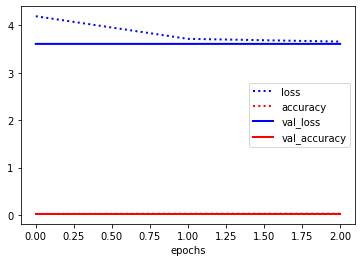

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 49152)             0         
_________________________________________________________________
dense (Dense)                (None, 10)                491530    
_________________________________________________________________
dense_1 (Dense)              (None, 37)                407       
Total params: 491,937
Trainable params: 491,937
Non-trainable params: 0
_________________________________________________________________
None


In [15]:
# Toy usage example
from tensorflow.keras import models
from tensorflow.keras import layers 

def build_toy_model():
    model = models.Sequential()
    model.add(layers.Reshape((49152,), input_shape=(128,128,3)))
    model.add(layers.Dense(10, activation='relu'))
    model.add(layers.Dense(37, activation='softmax'))
    model.compile(optimizer='rmsprop',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# First build and store
run_evaluation("toy_example", build_toy_model, evaluation_split, base_dir, 
               train=True, epochs=3, batch_size=32)

Max val score: 2.72%


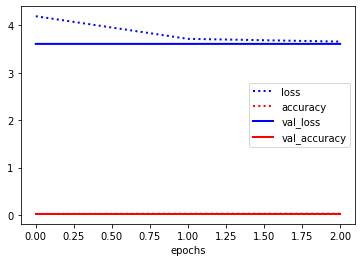

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 49152)             0         
_________________________________________________________________
dense (Dense)                (None, 10)                491530    
_________________________________________________________________
dense_1 (Dense)              (None, 37)                407       
Total params: 491,937
Trainable params: 491,937
Non-trainable params: 0
_________________________________________________________________
None


In [16]:
# Toy usage example
# With train=False: load from file and report the same results without rerunning
run_evaluation("toy_example", build_toy_model, evaluation_split, base_dir, 
               train=False)

## Part 1. Convolutional neural networks (15 points)
### Question 1.1: Design a ConvNet (12 points)
- Build a sequential convolutional neural network to distinguish cats from dogs. You can use the relabeling to a binary problem below.
- Try to achieve the best validation accuracy you can. You should be able to get at least 75% accuracy. 85% or more is also possible. You can use any depth, any combination of layers, and any kind of regularization and tuning. You can use different batch sizes and number of epochs as in question 1.
- Add a description of your design choices in 'answer_q_1_1': explain what you did and also why. Also discuss the performance of the model. Is it working well? Both the performance of the model and your explanations matter.
- Explictly explore different filter sizes and padding techniques. Explain what the effect is, also in relationship with the layer input sizes.
- You are allowed **1000** characters for this answer (but don’t ramble).
- The name of the model should be 'model_1_1'. Evaluate it using the 'run_evaluation' function and the preprocessed data as shown below.

In [17]:
# Makes the problem binary. Don't change or overwrite these variables.
pets_classes = {0: "cat", 1: "dog"}
train_classes = np.array([np.argmax(one_hot_vector) for one_hot_vector in y_train])
val_classes  = np.array([np.argmax(one_hot_vector) for one_hot_vector in y_val])
y_train_binary = np.array([0 if class_names[train_classes[i]] in cat_breeds else 1 for i in range(len(y_train))])
y_val_binary = np.array([0 if class_names[val_classes[i]] in cat_breeds else 1 for i in range(len(y_val))])
evaluation_split_binary = X_train, X_val, y_train_binary, y_val_binary

Training the model
Epoch 1/60
147/147 [==============================] - 32s 22ms/step - loss: 0.9514 - accuracy: 0.6832 - val_loss: 0.6400 - val_accuracy: 0.6777
Epoch 2/60
147/147 [==============================] - 3s 19ms/step - loss: 0.6219 - accuracy: 0.6816 - val_loss: 0.6140 - val_accuracy: 0.6794
Epoch 3/60
147/147 [==============================] - 3s 19ms/step - loss: 0.6100 - accuracy: 0.6751 - val_loss: 0.6117 - val_accuracy: 0.6947
Epoch 4/60
147/147 [==============================] - 3s 19ms/step - loss: 0.5845 - accuracy: 0.7032 - val_loss: 0.5781 - val_accuracy: 0.7389
Epoch 5/60
147/147 [==============================] - 3s 19ms/step - loss: 0.5764 - accuracy: 0.7168 - val_loss: 0.5492 - val_accuracy: 0.7551
Epoch 6/60
147/147 [==============================] - 3s 19ms/step - loss: 0.5365 - accuracy: 0.7279 - val_loss: 0.5031 - val_accuracy: 0.7526
Epoch 7/60
147/147 [==============================] - 3s 19ms/step - loss: 0.5185 - accuracy: 0.7441 - val_loss: 0.4794 - 

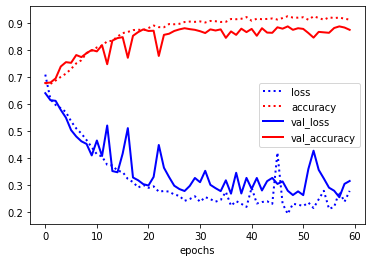

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 128)      

In [ ]:
from keras import regularizers
from tensorflow.keras import optimizers

def build_model_1_1():
   
    model = models.Sequential()

    model.add(layers.Conv2D(32, (3, 3), activation='relu',padding='same',
                        input_shape=(128, 128, 3)))
    
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.1))
    
    model.add(layers.Conv2D(64, (3, 3), activation='relu',padding='same'))

    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.2))
    
    model.add(layers.Conv2D(128, (3, 3), activation='relu',padding='same'))
  
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.3))
    
    model.add(layers.Conv2D(128, (3, 3), activation='relu',padding='same'))
  
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.4))

    model.add(layers.Conv2D(256, (3, 3), activation='relu',padding='same'))
  
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.5))

    model.add(layers.Conv2D(256, (3, 3), activation='relu',padding='same'))
  
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.5))
  
    model.add(layers.GlobalAveragePooling2D())
    
    model.add(layers.Dense(512, activation='relu'))
  
    model.add(layers.Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=0.001),
              metrics=['accuracy'])
    return model

run_evaluation("model_1_1", build_model_1_1 , evaluation_split_binary, base_dir, 
               train=True, epochs=60, batch_size=32)

answer_q_1_1 = """
              We have images of size 128*128 hence, this makes the problem quite complex and more parameters th better.
             1st, ayer with 32 filters is added, then a maxpooling layer is added, since it reduces the size
             by 2, a layer with 64 filters is added, this process is repeated for further layers with 128,128,256 and 256 are added.
             Dense layer of 512 is added to make sure all the information is retained snd (there is no information 
             bottleneck) followed by dense layer with 1 node since it is a binary problem.The RMS prop is used as with the learning rate of 
             0.001.binary_crossentropy and sigmoid activation is used since it is a binary problem. Batch_size = 32 gives better results, when compared with batch_size=64. Small batch 
             sizes are often considered noisy, hence it often gives regularizing effect. BatchNormalization 
             does not seem to work well with the dataset as it brings the accuracy down.

             """
print("Answer is {} characters long".format(len(answer_q_1_1)))

### Question 1.2: Data Augmentation (3 points)

- Augment the preprocessed training data. You can explore using image shifts, rotations, zooming, flips, etc. What works well, and what does not? Reason
about what might work or not on these images.
- Implement the generator in a function `augment_data` that returns a generator and the validation set
- Evaluate the model from question 1.1 with the augmented data using the 'run_evaluation' function. Store the new trained model as 'model_1_2'.
- Add a description of your design choices in 'answer_q_1_2': explain what you did and also why. Also discuss the performance of the model.

Training the model
Epoch 1/85
60/60 [==============================] - 8s 115ms/step - loss: 0.7177 - accuracy: 0.6198 - val_loss: 0.6304 - val_accuracy: 0.6777
Epoch 2/85
60/60 [==============================] - 7s 111ms/step - loss: 0.6215 - accuracy: 0.6932 - val_loss: 0.6136 - val_accuracy: 0.6777
Epoch 3/85
60/60 [==============================] - 7s 112ms/step - loss: 0.6161 - accuracy: 0.6936 - val_loss: 0.6837 - val_accuracy: 0.6777
Epoch 4/85
60/60 [==============================] - 7s 111ms/step - loss: 0.6347 - accuracy: 0.6751 - val_loss: 0.6034 - val_accuracy: 0.6794
Epoch 5/85
60/60 [==============================] - 7s 112ms/step - loss: 0.6241 - accuracy: 0.6749 - val_loss: 0.6352 - val_accuracy: 0.6726
Epoch 6/85
60/60 [==============================] - 7s 112ms/step - loss: 0.6137 - accuracy: 0.6852 - val_loss: 0.6345 - val_accuracy: 0.6769
Epoch 7/85
60/60 [==============================] - 7s 111ms/step - loss: 0.6137 - accuracy: 0.6762 - val_loss: 0.7058 - val_accu

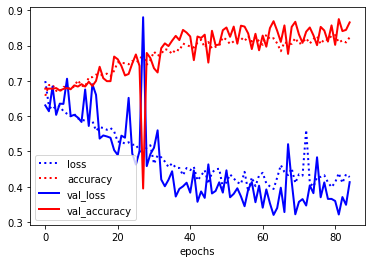

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 128, 128, 32)      896       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 64, 64, 32)        0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 64, 64, 64)        18496     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 32, 32, 64)        0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 32, 32, 128)      

In [ ]:
# Note that we build the same untrained model as in question 1.1 but store the 
# trained version as model_1_2. Change attributes as needed to run on augmented
# data
from tensorflow.keras.preprocessing.image import ImageDataGenerator

def augment_data():
    """ Augments the data and returns a generator and the validation data and labels
    """
    """
    train_datagen = ImageDataGenerator()
    
    """
    train_datagen = ImageDataGenerator(
      rotation_range=10,
      width_shift_range=0.1,
      height_shift_range=0.1,
      shear_range=0.1,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')
  
  
  
    # Boilerplate code. You can change this however you like.
    generator = train_datagen.flow(X_train, y_train_binary)
    return generator, X_val, y_val_binary

# Batch size should be None since we are using a generator.
# You can add a steps_per_epoch parameter if you like
run_evaluation("model_1_2", build_model_1_1, augment_data(), base_dir, 
               train=True, generator=True, epochs=85, batch_size=None)

answer_q_1_2 = """
               The model was built by trying various combinations of parameters in ImageDataGenerator().
               The misclassified images were also analyzed. The zoom range was increased from 0 to 0.2,
               inorder to rightly classify the images that had the dog/cat accommodated in small number
               of pixels. Changing the width, height and shear range slightly gave comparatively better results
               than keeping it as zero.The model performs fairly well, with good accuracy of 87 percent
               and more or less no overfitting.
               
               """

print("Answer is {} characters long".format(len(answer_q_1_2)))

## Part 2. Model interpretation (15 points)
### Question 2.1: Interpreting misclassifications (2 points)
Study which errors are still made by your last model (model_1_2) by evaluating it on the test data. You do not need to retrain the model, you can just reload it.
* What is the accuracy of model_1_2 on the test data? Store this in 'test_accuracy_2_1'.
* Plot the confusion matrix in 'plot_confusion_matrix' and discuss which classes are often confused.
* Analyze the misclassifications in more depth by visualizing which kinds of mistakes are made for each class (cat or dog). For instance, are the errors related to the background, noisiness, etc.? Implement the visualization in 'plot_misclassifications'. This is more of an open question. Some examples are sufficient, you don't need to plot all misclassifications.
* Summarize your findings in 'answer_q_2_1'. Is your model performing well, or
is it misguided in some way?

46/46 [==============================] - 0s 6ms/step - loss: 0.3995 - accuracy: 0.8850
test acc: 0.8850340247154236


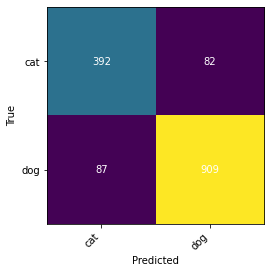

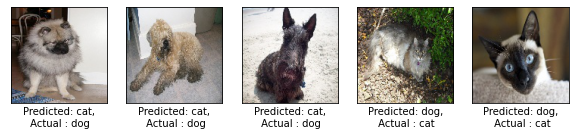

Answer is 797 characters long


In [ ]:
from sklearn.metrics import confusion_matrix
def evaluate_model():
    test_classes = np.array([np.argmax(one_hot_vector) for one_hot_vector in y_test])
    y_test_binary = np.array([0 if class_names[test_classes[i]] in cat_breeds else 1 for i in range(len(test_classes))])
    
    model = load_model(os.path.join(base_dir, 'model_1_2.h5'))
    test_loss, test_acc = model.evaluate(X_test,y_test_binary)
    print('test acc:', test_acc)
    return test_acc

test_accuracy_2_1 = evaluate_model()

def plot_confusion_matrix():
   test_classes = np.array([np.argmax(one_hot_vector) for one_hot_vector in y_test])
   y_test_binary = np.array([0 if class_names[test_classes[i]] in cat_breeds else 1 for i in range(len(test_classes))])
   model = load_model(os.path.join(base_dir, 'model_1_2.h5'))
   
   y_pred = model.predict(X_test)
   for i in range(len(y_pred)):
     if(y_pred[i]>=0.5):
       y_pred[i]=1
     else:
        y_pred[i]=0

   cm = confusion_matrix(y_test_binary,y_pred)
   fig, ax = plt.subplots()
   im = ax.imshow(cm)
   ax.set_xticks(np.arange(2)), ax.set_yticks(np.arange(2))
   ax.set_xticklabels(list(pets_classes.values()), rotation=45, ha="right")
   ax.set_yticklabels(list(pets_classes.values()))
   ax.set_ylabel('True')
   ax.set_xlabel('Predicted')
   for i in range(4):
        ax.text(int(i/2),i%2,cm[i%2,int(i/2)], ha="center", va="center", color="w")


def plot_misclassifications():
 
    test_classes = np.array([np.argmax(one_hot_vector) for one_hot_vector in y_test])
    y_test_binary = np.array([0 if class_names[test_classes[i]] in cat_breeds else 1 for i in range(len(test_classes))])

    model = load_model(os.path.join(base_dir, 'model_1_2.h5'))
    
    y_pred = model.predict(X_test)

    for i in range(len(y_pred)):
     if(y_pred[i]>=0.5):
       y_pred[i]=1
     else:
        y_pred[i]=0

    misclassified_samples = []
    for i in range(len(y_pred)):
     if(y_pred[i] != y_test_binary[i]):
       misclassified_samples.append(i)
       
  
    misclassified_samples = np.array(misclassified_samples)
    
    fig, axes = plt.subplots(1, 5,  figsize=(10,5))
    for nr, i in enumerate(misclassified_samples[:5]):
      axes[nr].imshow(X_test[i])
      str1 = pets_classes[int(y_pred[i])]
      str2 = pets_classes[int(y_test_binary[i])]
      axes[nr].set_xlabel("Predicted: %s,\n Actual : %s" % (str1,str2))
      axes[nr].set_xticks(()), axes[nr].set_yticks(())
    plt.show();


plot_confusion_matrix()
plot_misclassifications()

answer_q_2_1 = """
              The model is performing well, in terms of accuracy, although there are some things model does not see.
               The model is misguided if the image has a cat and dog together, but cat mostly in the backgorund.
               Also the model fails if the dogs/cats face is not facing the camera, like if just the left or right profile face is visible. 
               Some of it can be seen from the misclassified image below. Also its observed that the cats are misclassified more often
               than dogs from the confusion matrix.It could be because of the uneven distribution
              in the dataset,or the model seems to extract the features well for dogs.The model gives a decent accuracy of 88-89 percent
              for the test set as well.
               """
print("Answer is {} characters long".format(len(answer_q_2_1)))

### Question 2.2: Visualizing activations (8 points)

* Select the **14th** example from the test set (index 13, it should be a small dog). Retrieve and visualize the activations (feature maps) of model 1_2 for that example, for every filter for different convolutional layers (at different depths in the network). Implement a function `plot_activations()` that returns these activations. Check the code in the notebook of the CNN lecture to see how this is usually done.
* Give an explanation (as detailed as you can) about your observations in 'answer_q_2_2'. Is your model indeed learning something useful?

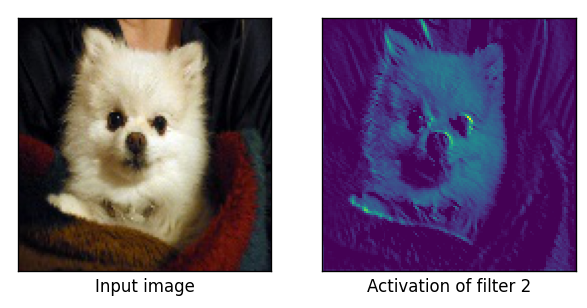

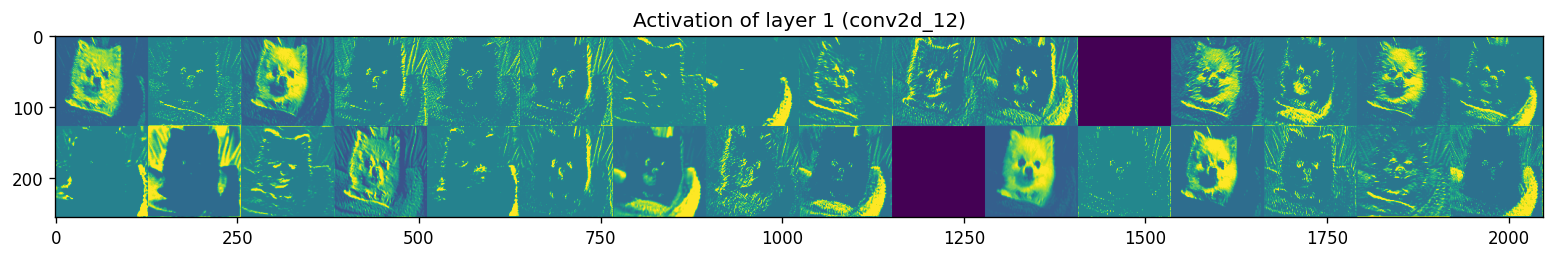

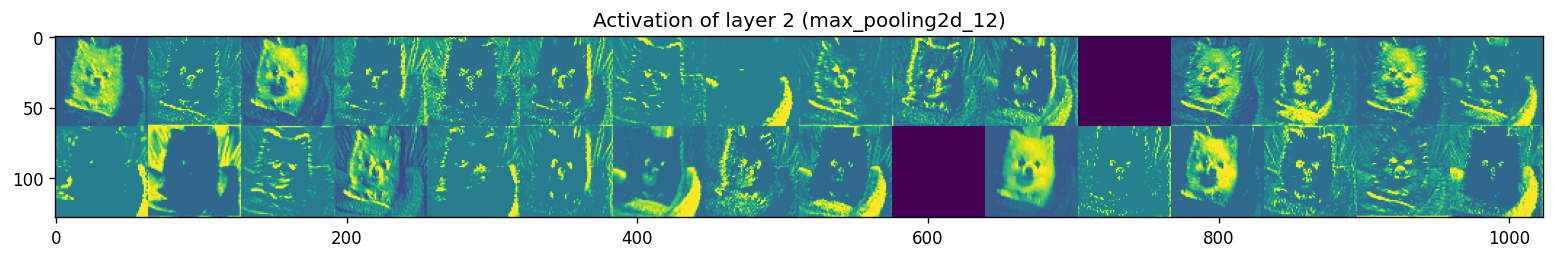

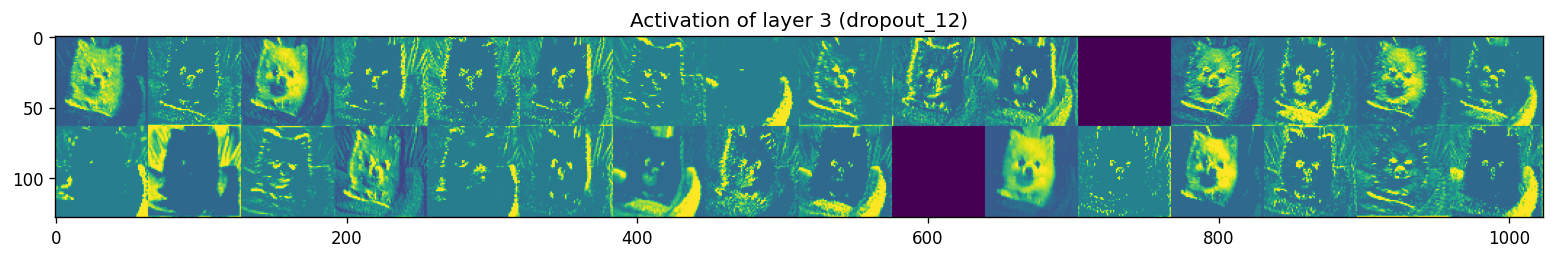

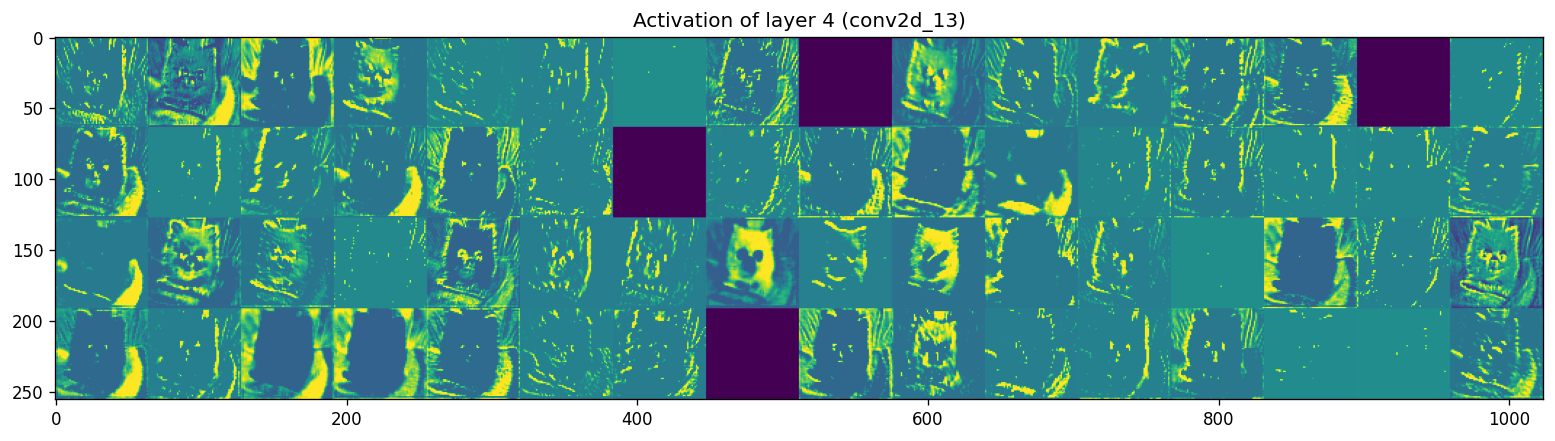

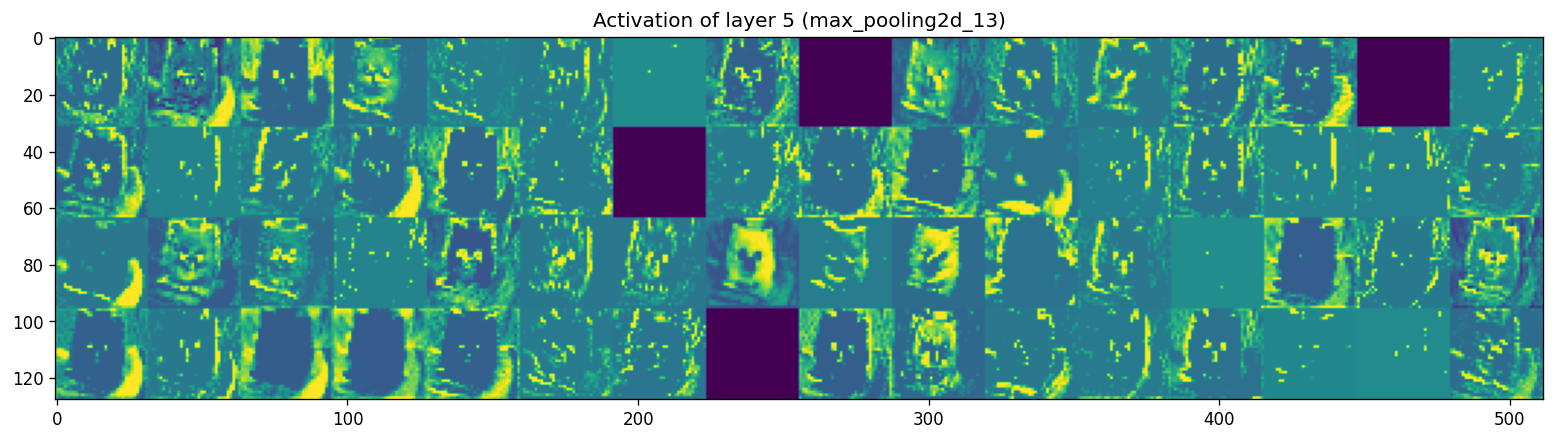

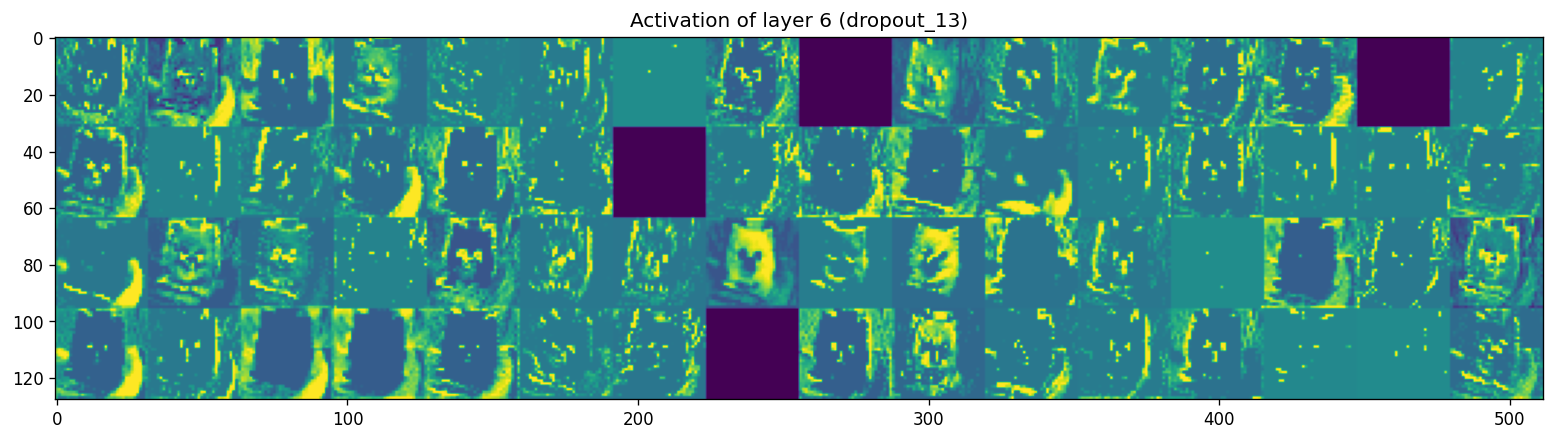

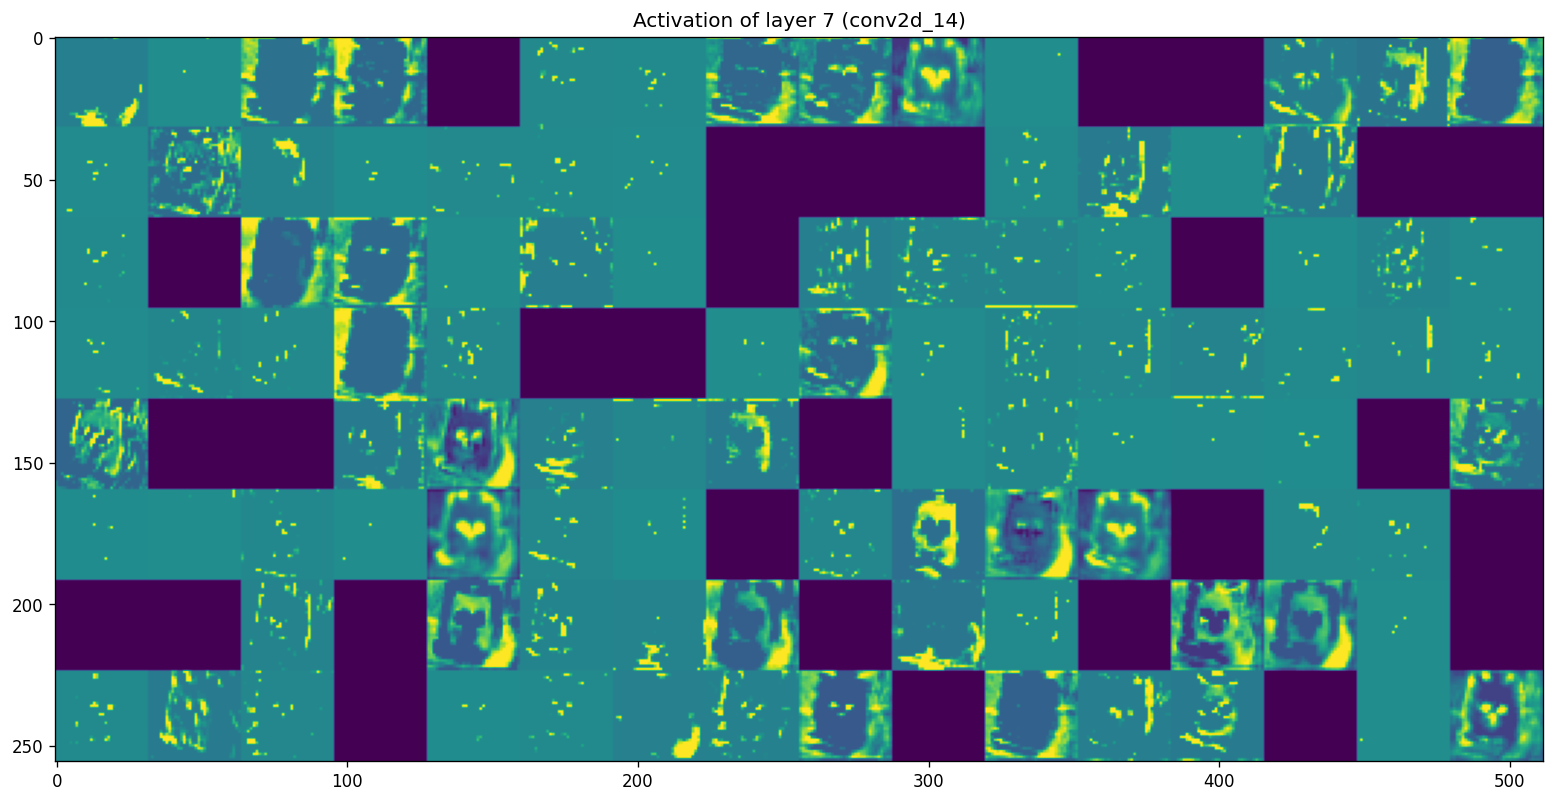

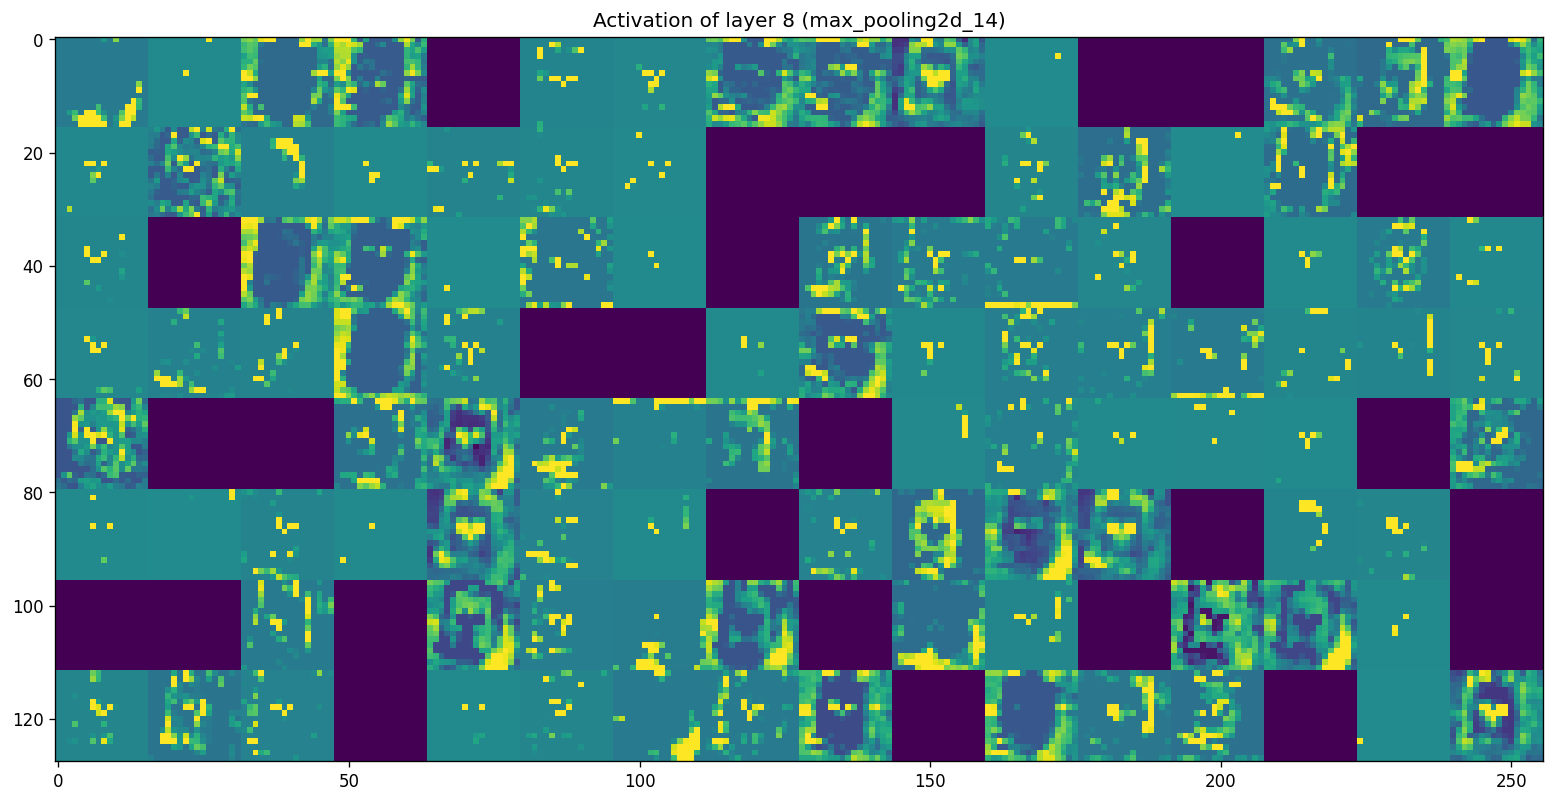

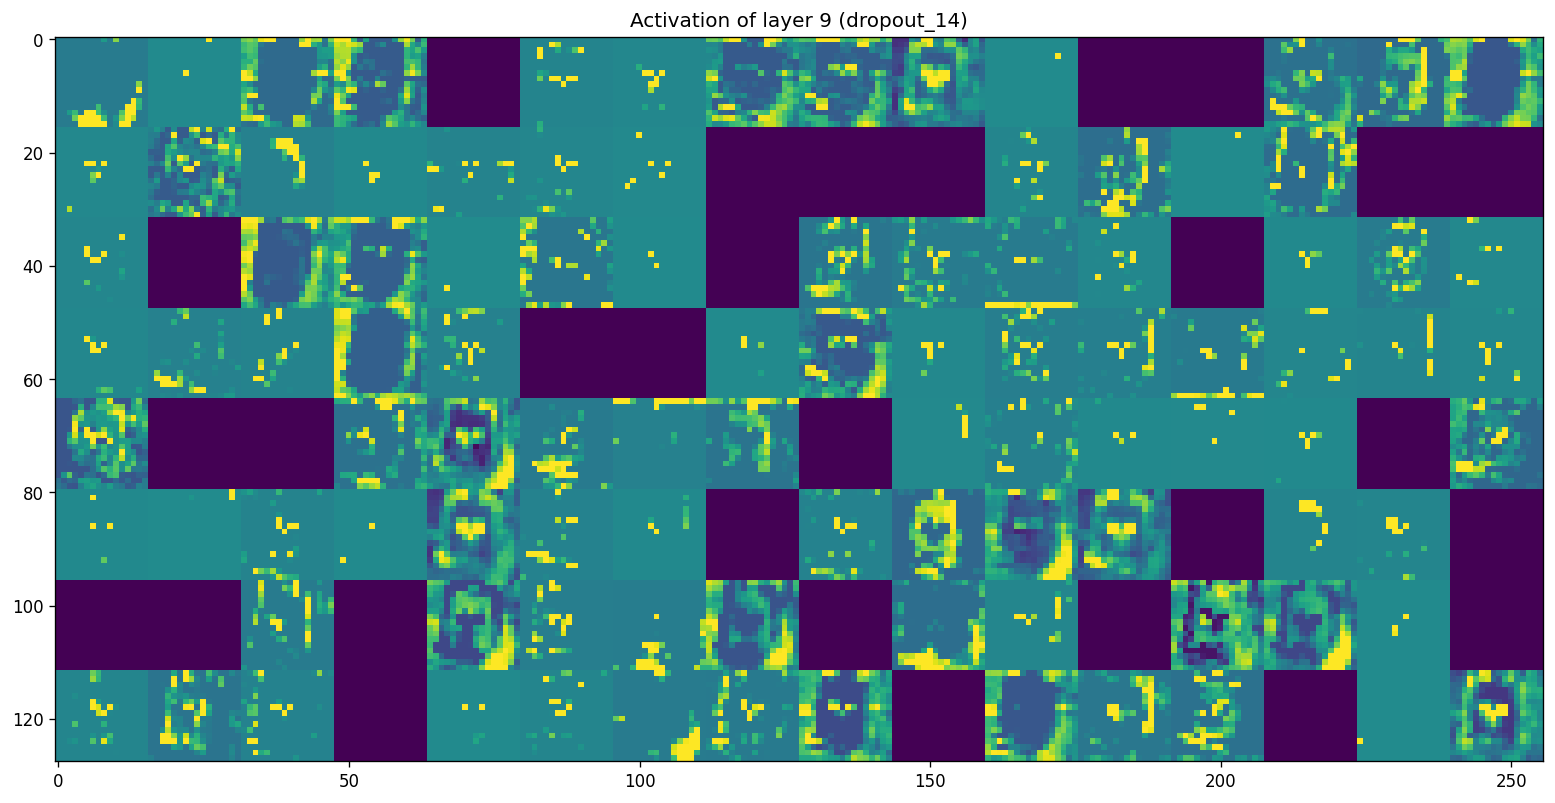

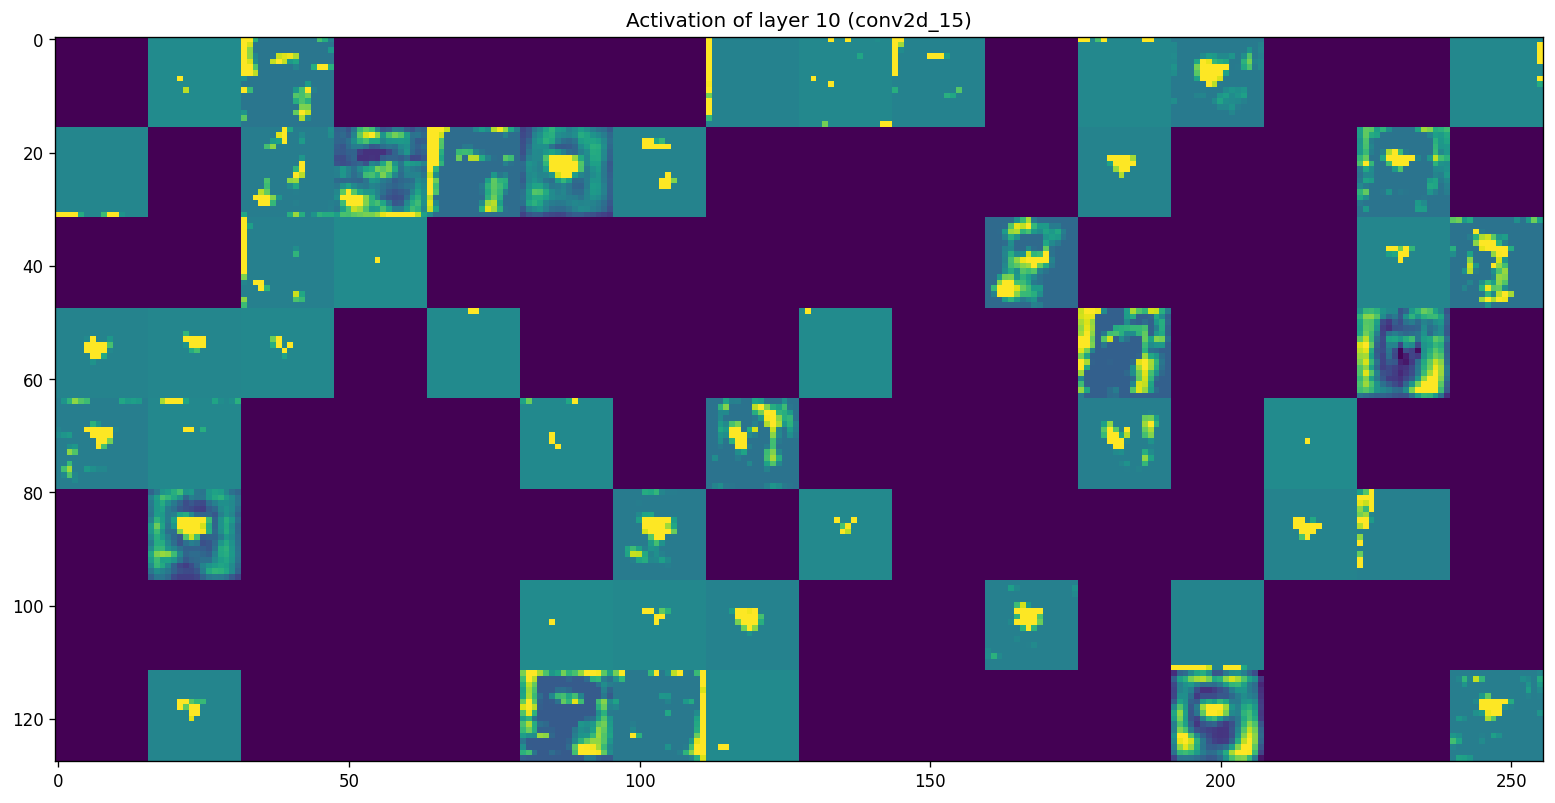

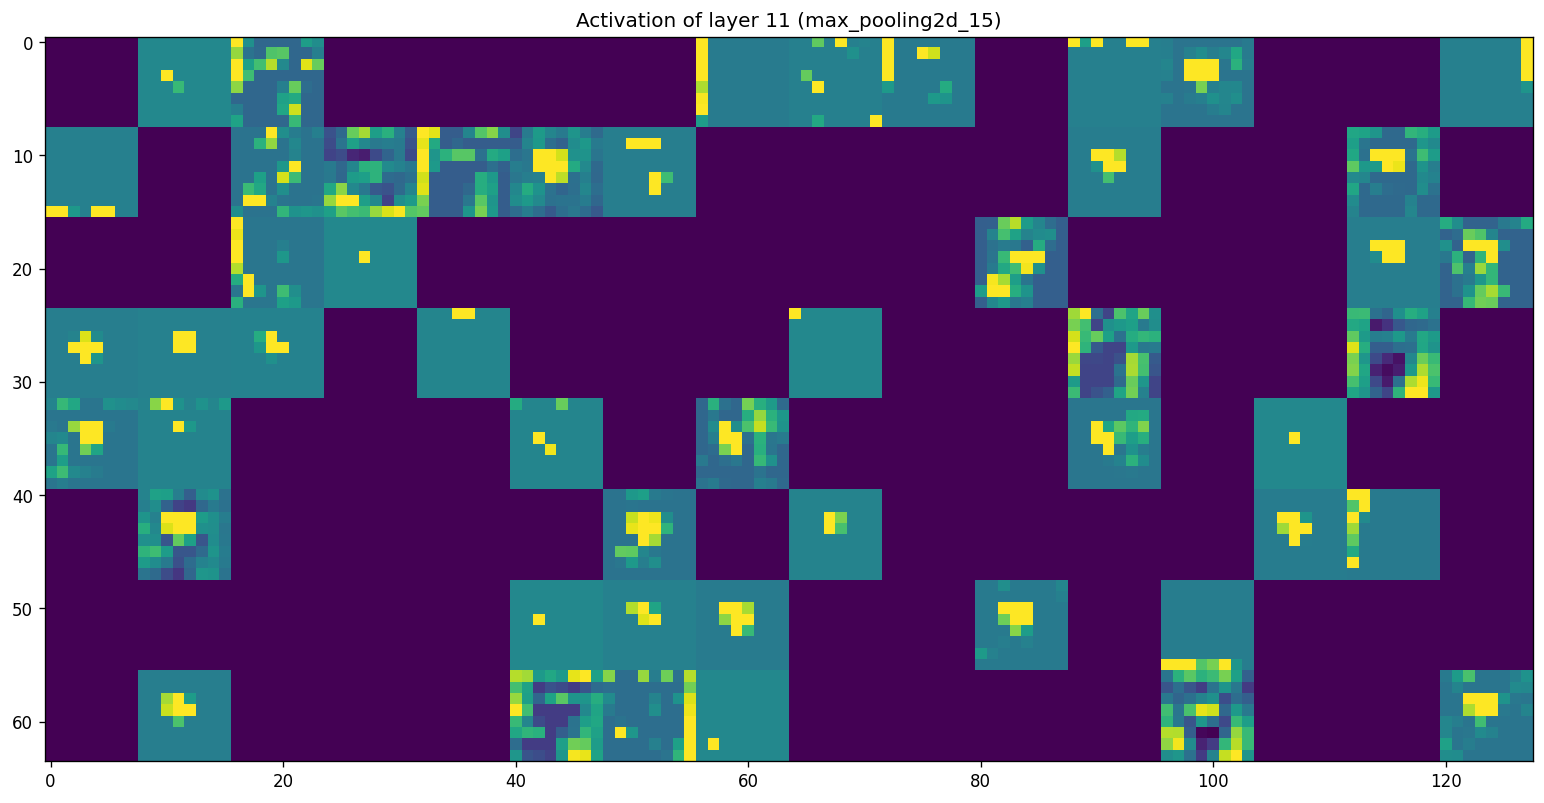

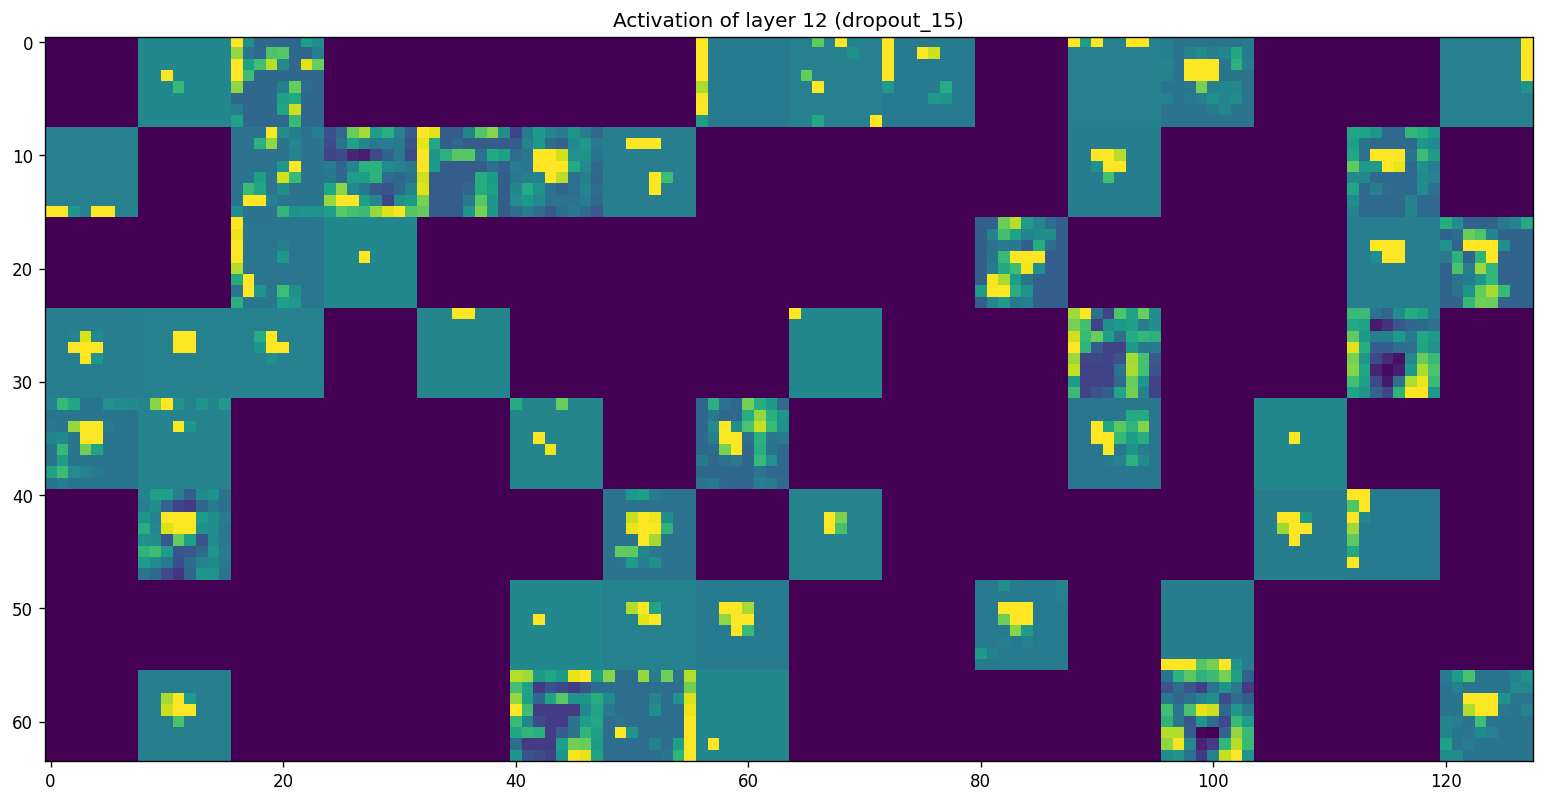

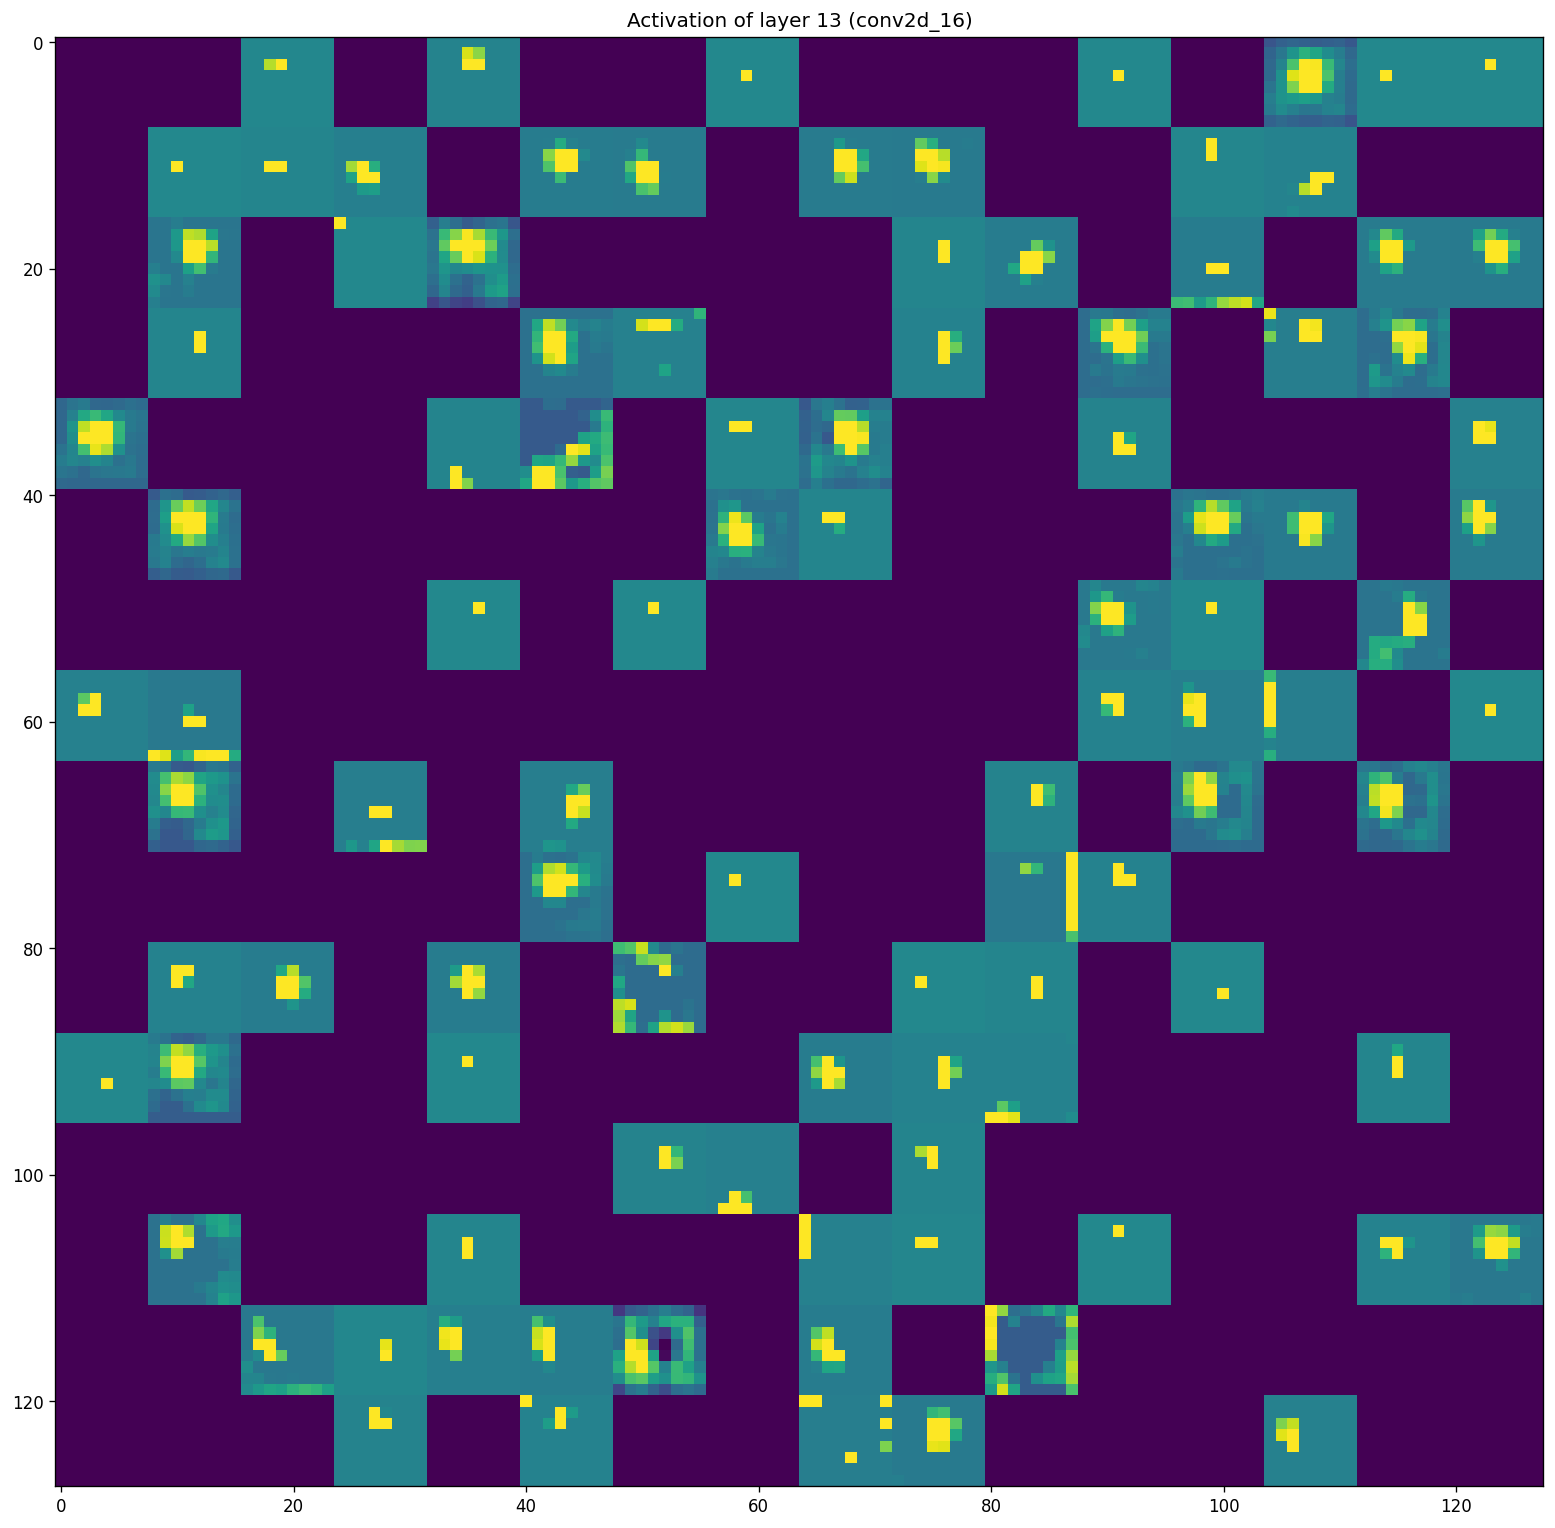

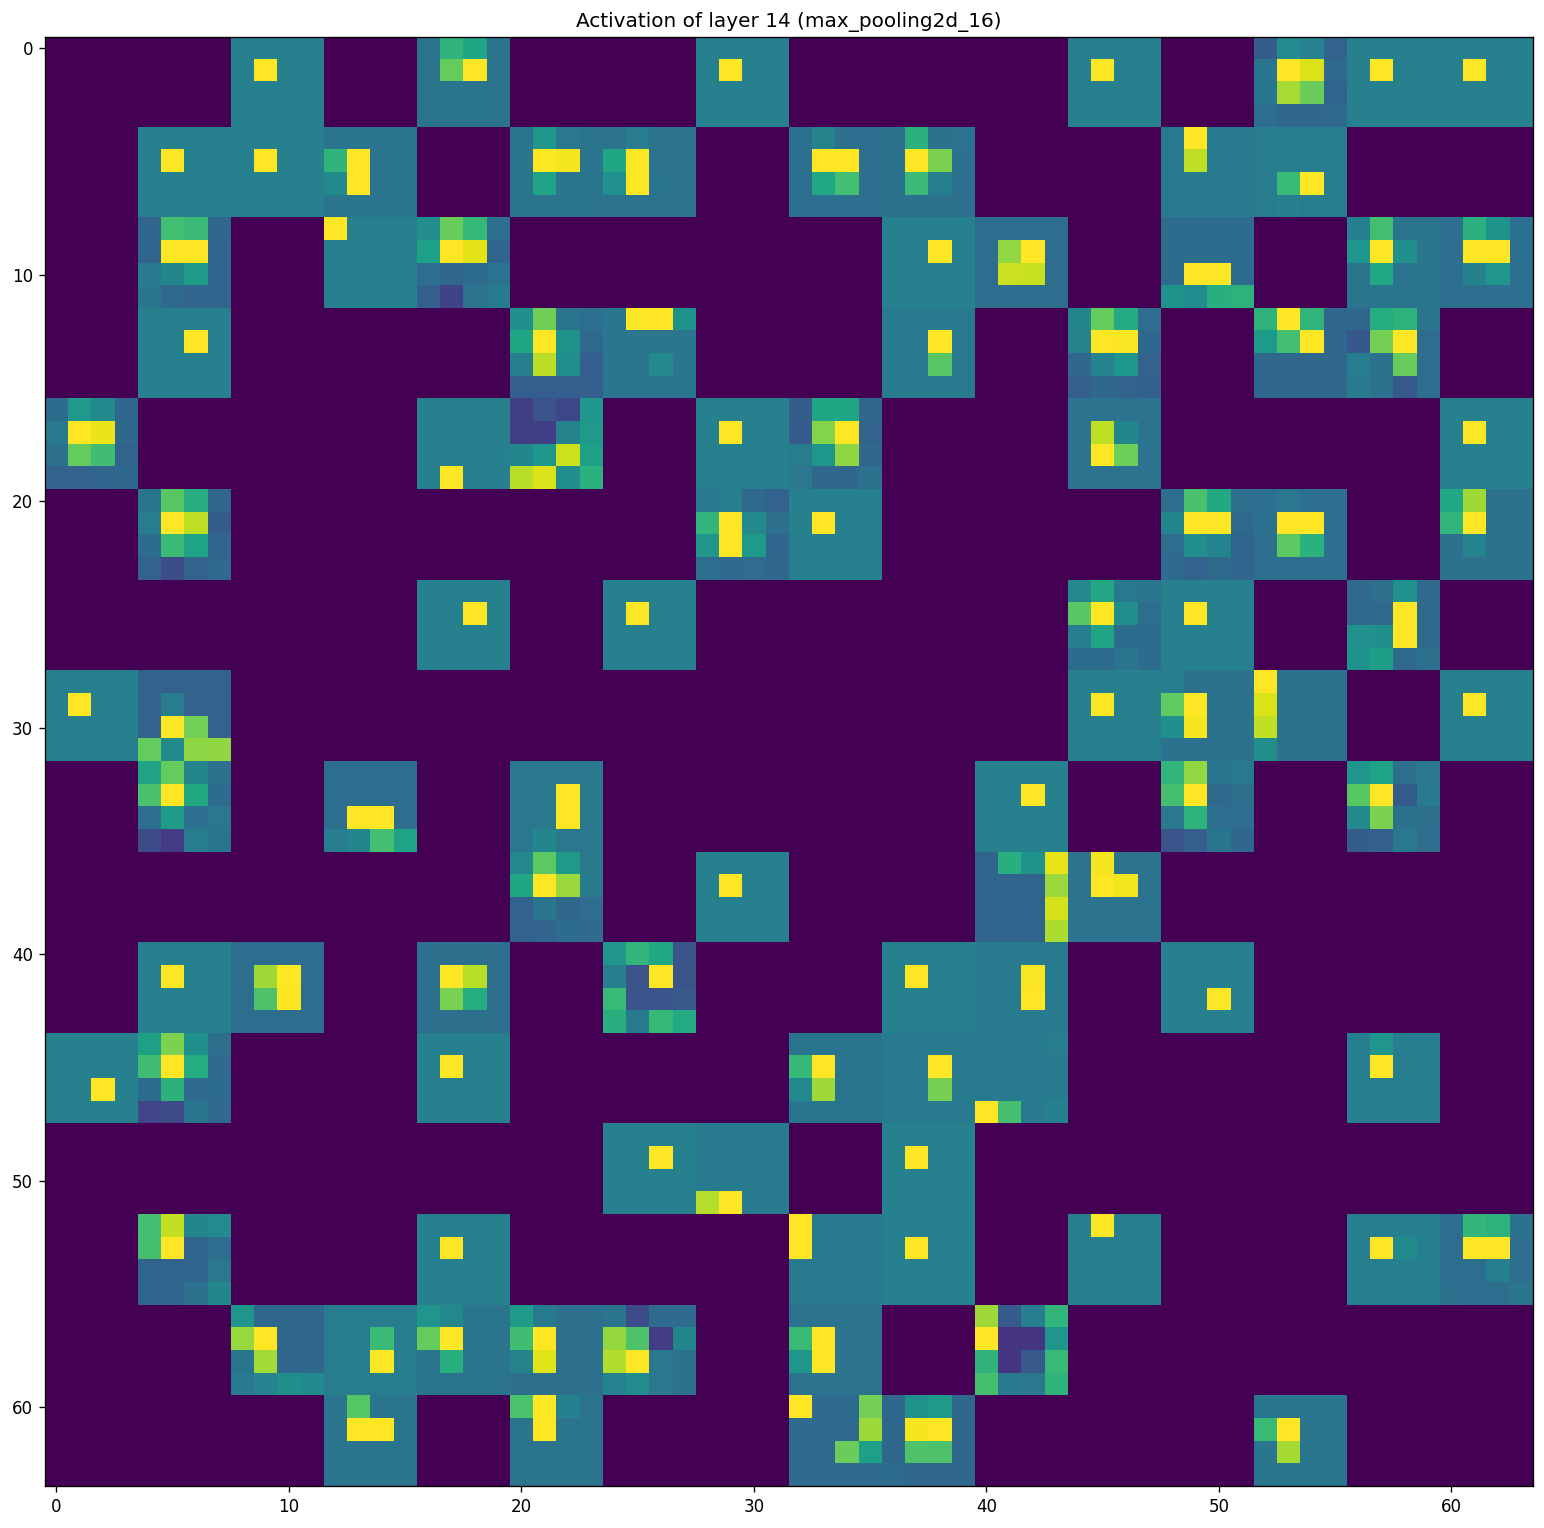

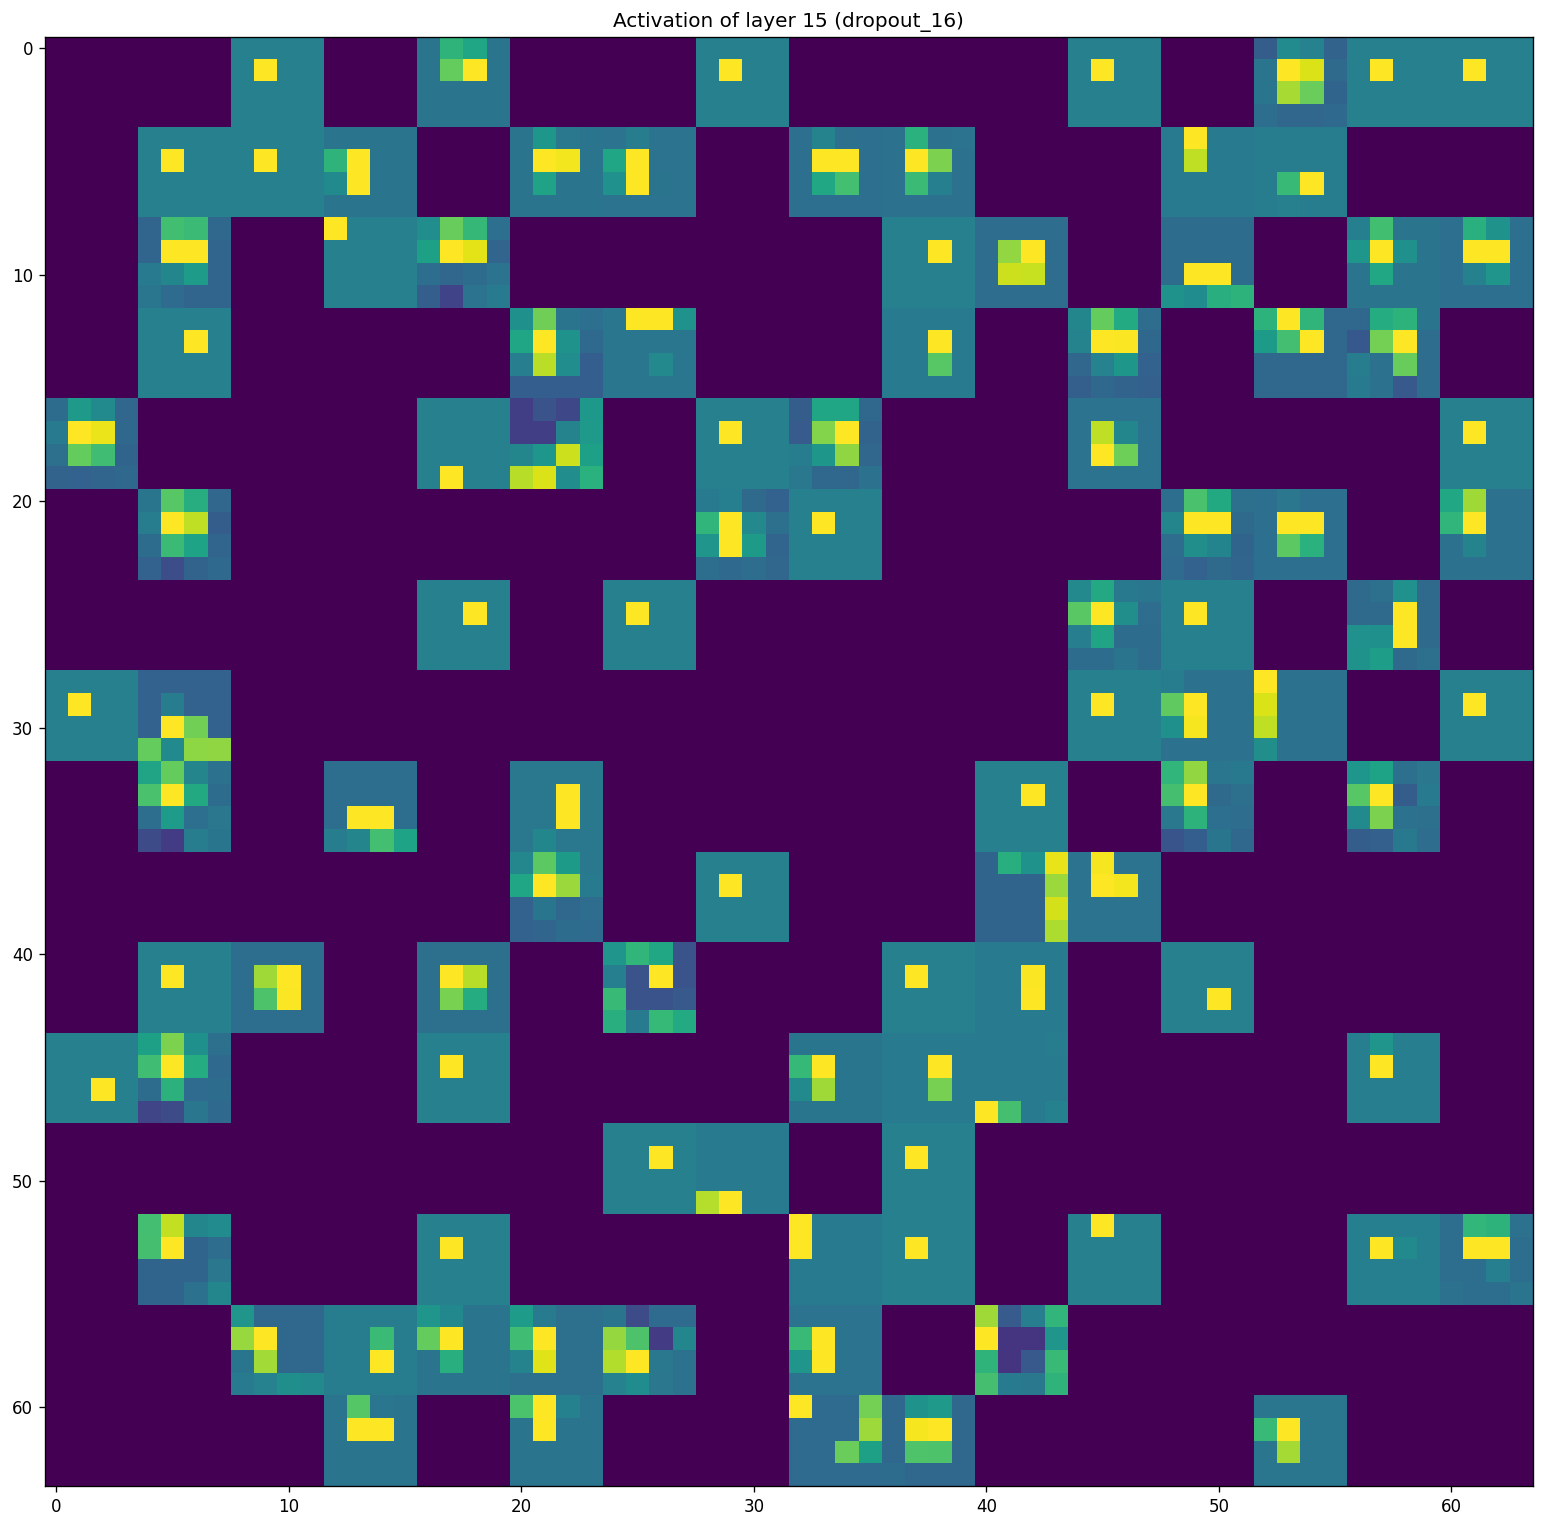

Answer is 726 characters long


In [18]:
from tensorflow.keras import models
np.seterr(divide='ignore', invalid='ignore')

def plot_activations():
    img_tensor = X_test[13]
    img_tensor = np.expand_dims(img_tensor, axis=0) 
    model = load_model(os.path.join(base_dir, 'model_1_2.h5'))
    # Extracts the outputs of the top 20 layers:
    layer_outputs = [layer.output for layer in model.layers[:20]]
    # Creates a model that will return these outputs, given the model input:
    activation_model = models.Model(inputs=model.input, outputs=layer_outputs) 

    # This will return a list of 5 Numpy arrays:
    # one array per layer activation
    activations = activation_model.predict(img_tensor)
    plt.rcParams['figure.dpi'] = 120
    first_layer_activation = activations[0]
    f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
    ax1.imshow(img_tensor[0])
    ax2.matshow(first_layer_activation[0, :, :, 2], cmap='viridis')
    ax1.set_xticks([])
    ax1.set_yticks([])
    ax2.set_xticks([])
    ax2.set_yticks([])
    ax1.set_xlabel('Input image')
    ax2.set_xlabel('Activation of filter 2')
    
    images_per_row = 16
    layer_names = []
    for layer in model.layers[:15]:
      layer_names.append(layer.name)
    
    for layer_index in range(18):
      start = layer_index
      end = layer_index+1
      # Now let's display our feature maps
      for layer_name, layer_activation in zip(layer_names[start:end], activations[start:end]):
        # This is the number of features in the feature map
        n_features = layer_activation.shape[-1]

        # The feature map has shape (1, size, size, n_features)
        size = layer_activation.shape[1]

        # We will tile the activation channels in this matrix
        n_cols = n_features // images_per_row
        display_grid = np.zeros((size * n_cols, images_per_row * size))

        # We'll tile each filter into this big horizontal grid
        for col in range(n_cols):
            for row in range(images_per_row):
                channel_image = layer_activation[0,
                                                 :, :,
                                                 col * images_per_row + row]
                # Post-process the feature to make it visually palatable
                channel_image -= channel_image.mean()
                channel_image /= channel_image.std()
                channel_image *= 64
                channel_image += 128
                channel_image = np.clip(channel_image, 0, 255).astype('uint8')
                display_grid[col * size : (col + 1) * size,
                             row * size : (row + 1) * size] = channel_image

        # Display the grid
        scale = 1. / size
        plt.figure(figsize=(scale * display_grid.shape[1],
                            scale * display_grid.shape[0]))
        plt.title("Activation of layer {} ({})".format(layer_index+1,layer_name))
        plt.grid(False)
        plt.imshow(display_grid, aspect='auto', cmap='viridis')
        plt.show()


plot_activations()
answer_q_2_2 = """
                The 32 filters in 1st layer react in a different way, like some detect the edges. For eg, in the 1st activation layer the 11th and 12th images in first row detect vertical edges. Some filters retain almost all the  information of the image this allows information to flow deeper into the network. The filter in layer 4,row 3,image 16 detects the eyes. Some of the filters dont respond for cats, they might respond  to dogs. In the further layers resolution is decreased beacuse of the maxpooling. Layers 5 and 6 learn shapes of the ears,nose etc. So its clear that the initial layers learn the edges,lines etc,  where as deeper layers learn complex structures like eyes, ears, face shapes etc.
               """
               
print("Answer is {} characters long".format(len(answer_q_2_2)))

### Question 2.3: Visualizing the learned embeddings with tSNE (5 points)

Extract the learned embeddings of the images from X_train using your `model_1_2` and plot them on a 2D map using [tSNE](https://lvdmaaten.github.io/tsne/) as the dimensionality reduction technique.

- Implement a function `create_embeddings` to extract the n-sized embeddings based on the  Convolutional part of `model_1_2` (e.g VGG16 generates 512-sized embeddings)
- Implement a function `compute_tsne` that applies scikit-learn's implementation of [tSNE](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html) to reduce the size of the embeddings from n to 2 (e.g for VGG16 this will mean `original_array` of  size (num_images, 512) compressed to a reduced array of size (num_images, 2))
- Implement a function `plot_tsne` that plots the 2D vector on a map highlighting the formed clusters, and color-coded by the true binary labels
- Interpret the results from the map in `answer_q_2_3`

In [ ]:
from sklearn.manifold import TSNE

def create_embeddings(model_file):
    """ Returns the image embeddings of X_train learned in the given model
    """
    model = load_model(os.path.join(base_dir, 'model_1_2.h5'))
    feature_extraction_model = tf.keras.Model(model.inputs, model.layers[18].output)
    
    features_train = feature_extraction_model.predict(X_train)
    print(len(features_train))
    return features_train

def compute_tsne(original_array):
    """ Returns the 2D embeddings of original_array created by TSNE
    """
    X_embedded = TSNE(n_components=2, perplexity=35, learning_rate=25, n_jobs=-1,verbose=2).fit_transform(original_array)
    return X_embedded

# n-sized embeddings extracted from X_train and reduced to 2-sized embeddings
dn_embs = create_embeddings("model_1_2")
d2_embs = compute_tsne(dn_embs)


4703
[t-SNE] Computing 106 nearest neighbors...
[t-SNE] Indexed 4703 samples in 0.114s...
[t-SNE] Computed neighbors for 4703 samples in 1.011s...
[t-SNE] Computed conditional probabilities for sample 1000 / 4703
[t-SNE] Computed conditional probabilities for sample 2000 / 4703
[t-SNE] Computed conditional probabilities for sample 3000 / 4703
[t-SNE] Computed conditional probabilities for sample 4000 / 4703
[t-SNE] Computed conditional probabilities for sample 4703 / 4703
[t-SNE] Mean sigma: 4.440864
[t-SNE] Computed conditional probabilities in 0.284s
[t-SNE] Iteration 50: error = 87.2583847, gradient norm = 0.0000689 (50 iterations in 0.966s)
[t-SNE] Iteration 100: error = 74.6391525, gradient norm = 0.0040368 (50 iterations in 1.119s)
[t-SNE] Iteration 150: error = 71.0770264, gradient norm = 0.0029491 (50 iterations in 0.928s)
[t-SNE] Iteration 200: error = 70.0940094, gradient norm = 0.0015733 (50 iterations in 0.850s)
[t-SNE] Iteration 250: error = 69.7190323, gradient norm = 0.0

Answer is 641 characters long


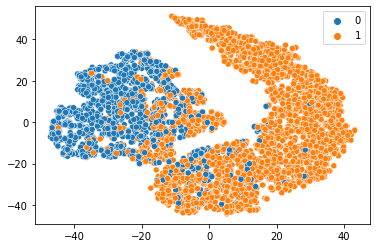

In [ ]:
import seaborn as sns
"""
import matplotlib.pyplot as plt
print(len(d2_embs))
print(len(y_train_binary))
print(d2_embs.shape)
print(y_train_binary.shape)
"""

def plot_tsne(tsne_embeds,labels):
  sns.scatterplot(data=tsne_embeds, x=tsne_embeds[:,0], y=tsne_embeds[:,1], hue=labels)

plot_tsne(d2_embs, y_train_binary)

answer_q_2_3 = """
               The plot does not nicely form the 2 clusters.To visualize the high dimensional pixel data in 2D we choose to use TSNE.
                perplexity is not set to very less, since the dataset is huge. The perpelexity is set to 35. Learning rate is set to 
               25 from the experimental trial and error, as a very high learning rate gives ball structure. The output varies each time, even with the same parameters. The globalPooling2D layer is used while building the model
               to get TSNE better results for TSNE plots. However we do not get the expected plot with 2 clearly differentiable clusters.
               """
print("Answer is {} characters long".format(len(answer_q_2_3)))

## Part 3. Transfer learning (20 points)
### Question 3.1 Transfer learning from VGG16 (8 points)

- Import the VGG16 model, pretrained on ImageNet. [See here](https://keras.io/applications/). Only import the convolutional part, not the dense layers.
- Implement a function 'build_model_3_1` that adds at least one dense hidden layer and output layer to the convolutional base, and freezes the convolutional base. Consider unfreezing the last few convolutional layers, in a systematic way, and evaluate whether that works better. You can also consider adding multiple dense hidden layers and regularization layers.
- Train the resulting model on the augmented training data for the 37-class problem (**not binary classification**).
- Evaluate the resulting model using 'run_evaluate'. Discuss the observed performance in 'answer_q_3_1'.

Training the model
Epoch 1/80
60/60 [==============================] - 8s 120ms/step - loss: 3.9794 - accuracy: 0.0294 - val_loss: 3.4640 - val_accuracy: 0.0714
Epoch 2/80
60/60 [==============================] - 7s 117ms/step - loss: 3.5968 - accuracy: 0.0598 - val_loss: 3.4481 - val_accuracy: 0.0714
Epoch 3/80
60/60 [==============================] - 7s 115ms/step - loss: 3.3732 - accuracy: 0.0988 - val_loss: 3.1225 - val_accuracy: 0.1114
Epoch 4/80
60/60 [==============================] - 7s 116ms/step - loss: 3.0370 - accuracy: 0.1397 - val_loss: 2.9413 - val_accuracy: 0.1514
Epoch 5/80
60/60 [==============================] - 7s 116ms/step - loss: 2.8479 - accuracy: 0.1875 - val_loss: 2.7136 - val_accuracy: 0.2151
Epoch 6/80
60/60 [==============================] - 7s 116ms/step - loss: 2.5951 - accuracy: 0.2338 - val_loss: 2.2733 - val_accuracy: 0.3597
Epoch 7/80
60/60 [==============================] - 7s 118ms/step - loss: 2.5204 - accuracy: 0.2610 - val_loss: 2.2120 - val_accu

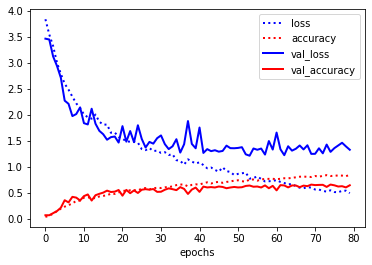

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 4, 4, 512)         14714688  
_________________________________________________________________
global_average_pooling2d_4 ( (None, 512)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 256)               131328    
_________________________________________________________________
dropout_4 (Dropout)          (None, 256)               0         
_________________________________________________________________
batch_normalization_4 (Batch (None, 256)               1024      
_________________________________________________________________
dense_13 (Dense)             (None, 37)                9509      
Total params: 14,856,549
Trainable params: 2,501,157
Non-trainable params: 12,355,392
__________________________________

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg16 import VGG16
from keras.layers import Input, Flatten, Dense, Dropout

# Load ImageNet pre-trained VGG16
conv_base = None

def augment_data_multi_class():
    """ Augments the data and returns a generator and the validation data and labels
    """
    # Boilerplate code. You can change this however you like.
    generator = ImageDataGenerator(
      rotation_range=10,
      width_shift_range=0.1,
      height_shift_range=0.1,
      shear_range=0.1,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest').flow(X_train, y_train)
    return generator, X_val, y_val

def build_model_3_1():

  conv_base = VGG16(weights='imagenet', include_top=False, input_shape=(128, 128, 3))
  model = models.Sequential()
  model.add(conv_base)
  model.add(layers.GlobalAveragePooling2D())
  model.add(layers.Dense(256, activation='relu'))
  model.add(layers.Dropout(0.5))
  model.add(layers.BatchNormalization())
 
  model.add(layers.Dense(37, activation='softmax'))
  conv_base.trainable = True

  for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        layer.trainable = True
    else:
        layer.trainable = False
  
  model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
  return model
  

run_evaluation("model_3_1", build_model_3_1, augment_data_multi_class(), base_dir, train=True, generator=True, epochs=80, batch_size=None)

answer_q_3_1 = """
              By freezing the convolutional layers, the accuracy achieved is less than 50 percent. 
               Then the model is built by unfreezing the block 5 and adding one dense layer with 512 nodes, the model seems to overfit even after adding a dropout layer
               with 0.5 dropout. So the model is rebuilt by adding a dense layer with 128 nodes, the accuracy was about 60 percent, but slight 
               overfitting was observed even with 80 epochs. So finally the model is rebuilt with 256 nodes, and comparatively better results are observed.
              The optimizer used is "adam". Adam and rmsprop both give almost similar results when tried, but adam slightly gives better accuracy(1 percent more).
              """

print("Answer is {} characters long".format(len(answer_q_3_1)))

### Question 3.2 Choosing models to transfer (7 points)

Perform the same transfer learning as in `Question 3.1`, but choose a different pre-trained architecture. 

- Try to beat the performance of VGG16. 
- For a comparision between different architectures, see [this link](https://towardsdatascience.com/illustrated-10-cnn-architectures-95d78ace614d). 
- We recommend to choose one of the available architectures from [Keras Applications](https://keras.io/api/applications/). Keep in mind that bigger models don't always perform better, and make sure that the trained weights do
not take more than 100MB of storage.
- Evaluate the resulting model using 'run_evaluate'. Discuss the observed performance in 'answer_q_3_2'.


6
Training the model
Epoch 1/70
60/60 [==============================] - 12s 142ms/step - loss: 2.9341 - accuracy: 0.2657 - val_loss: 1.3365 - val_accuracy: 0.5986
Epoch 2/70
60/60 [==============================] - 7s 125ms/step - loss: 1.8633 - accuracy: 0.5065 - val_loss: 1.1781 - val_accuracy: 0.6752
Epoch 3/70
60/60 [==============================] - 7s 123ms/step - loss: 1.5734 - accuracy: 0.5716 - val_loss: 1.1051 - val_accuracy: 0.6675
Epoch 4/70
60/60 [==============================] - 7s 122ms/step - loss: 1.4431 - accuracy: 0.6071 - val_loss: 1.1295 - val_accuracy: 0.6616
Epoch 5/70
60/60 [==============================] - 7s 123ms/step - loss: 1.3648 - accuracy: 0.6146 - val_loss: 1.0416 - val_accuracy: 0.7007
Epoch 6/70
60/60 [==============================] - 7s 122ms/step - loss: 1.3548 - accuracy: 0.6085 - val_loss: 1.0044 - val_accuracy: 0.6930
Epoch 7/70
60/60 [==============================] - 7s 121ms/step - loss: 1.3486 - accuracy: 0.6110 - val_loss: 0.9827 - val_a

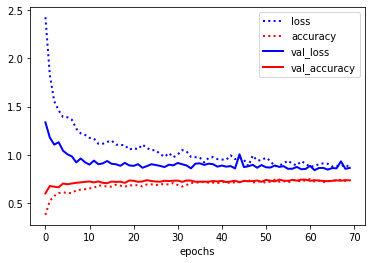

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_v3 (Functional)    (None, 2, 2, 2048)        21802784  
_________________________________________________________________
global_average_pooling2d_3 ( (None, 2048)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 256)               524544    
_________________________________________________________________
dropout_3 (Dropout)          (None, 256)               0         
_________________________________________________________________
batch_normalization_285 (Bat (None, 256)               1024      
_________________________________________________________________
dense_11 (Dense)             (None, 37)                9509      
Total params: 22,337,861
Trainable params: 534,565
Non-trainable params: 21,803,296
____________________________________

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import *

# Load ImageNet pre-trained model, other than VGG16 or VGG19
conv_base = None

def build_model_3_2():
  conv_base = InceptionV3(weights='imagenet', include_top=False, input_shape=(128, 128, 3))
  model = models.Sequential()
  model.add(conv_base)
  model.add(layers.GlobalAveragePooling2D())
  model.add(layers.Dense(256, activation='relu'))
  model.add(layers.Dropout(0.5))
  model.add(layers.BatchNormalization())
  model.add(layers.Dense(37, activation='softmax'))
  conv_base.trainable = True

  for layer in conv_base.layers:
    if layer.name == 'block14_conv1':
        layer.trainable = True
    else:
        layer.trainable = False
    
  model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
  print(len(model.layers))
  return model

run_evaluation("model_3_2", build_model_3_2, augment_data_multi_class(), base_dir, 
               train=True, generator=True, epochs=70, batch_size=None)

answer_q_3_2 = """
               InceptionV3 is picked because of its good accuracy than vgg16 and the size of the model is also less than 100MB.
               The model gives good results when the last block is unfreezed and made trainable. Since there are 37 classes to learn,
               adding dense layer with 256 nodes, followed by dropout layer with 0.5 dropout and batchnormalization, gives good results.
               Adding 512 nodes also gives good results, but the number of parametres are more in that case.So 256 nodes 
               are added as dense layers. And also block14_conv1 is made trainable, so that it learns the given problem well.
               Doing this increases the accuracy as well. 
              """

print("Answer is {} characters long".format(len(answer_q_3_2)))

### Question 3.3 Visualizing embeddings with tSNE (5 points)

Plot the same embeddings 2D map as in `Question 2.3`, but using `model_3_2` as the feature extractor. 

- Plot the 2D vector on a map highlighting the formed 37 clusters
- Interpret the results from the map in answer_q_3_3

In [ ]:
def create_embeddings_3_3(model_file):
    """ Returns the image embeddings of X_train learned in the given model
    """
    model = load_model(os.path.join(base_dir, 'model_3_2.h5'))
    feature_extraction_model = tf.keras.Model(model.inputs, model.get_layer(name='global_average_pooling2d_3').output)
    features_train = feature_extraction_model.predict(X_train)
    print(len(features_train))
    return features_train


4703
[t-SNE] Computing 106 nearest neighbors...
[t-SNE] Indexed 4703 samples in 1.206s...
[t-SNE] Computed neighbors for 4703 samples in 30.271s...
[t-SNE] Computed conditional probabilities for sample 1000 / 4703
[t-SNE] Computed conditional probabilities for sample 2000 / 4703
[t-SNE] Computed conditional probabilities for sample 3000 / 4703
[t-SNE] Computed conditional probabilities for sample 4000 / 4703
[t-SNE] Computed conditional probabilities for sample 4703 / 4703
[t-SNE] Mean sigma: 20.757812
[t-SNE] Computed conditional probabilities in 0.344s
[t-SNE] Iteration 50: error = 84.4061890, gradient norm = 0.0000014 (50 iterations in 1.061s)
[t-SNE] Iteration 100: error = 84.3164597, gradient norm = 0.0023047 (50 iterations in 0.941s)
[t-SNE] Iteration 150: error = 81.9959259, gradient norm = 0.0009859 (50 iterations in 0.903s)
[t-SNE] Iteration 200: error = 81.6103058, gradient norm = 0.0000508 (50 iterations in 0.990s)
[t-SNE] Iteration 250: error = 81.6017838, gradient norm = 0

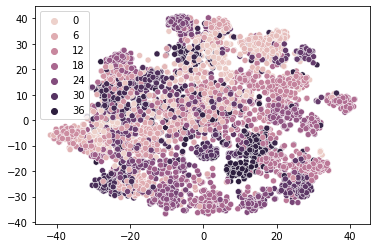

In [ ]:
dn_embs_37 = create_embeddings_3_3("model_3_2")
d2_embs_37 = compute_tsne(dn_embs_37)

plot_tsne(d2_embs_37, train_classes)

answer_q_3_3 = """
               Effort is made to extract the features from the global_average_pooling2d_3(flat layer), to 2D and then plot,
               the scatter plot.But the TSNE does not give 37 clusters as expected. Although I can see some balls of clusters
               being formed, but I am unsure if things are going in the right direction here.
               """

print("Answer is {} characters long".format(len(answer_q_3_3)))